In [2]:
#Importación de librerías Requeridas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import numpy as np
import sys
import tensorflow as tf
import time
from sklearn.preprocessing import OneHotEncoder



In [3]:
import pandas as pd
file_path = 'bank-full.csv'
df = pd.read_csv(file_path)
df = pd.read_csv(file_path, sep=';')  
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
duplicates = len(df[df.duplicated()])
print(f'Number of Duplicate Entries: {duplicates}')

Number of Duplicate Entries: 0


In [6]:
# número de valores perdidos
missing_values = df.isnull().sum().sum()
print(f'Number of Missing Values: {missing_values}')

Number of Missing Values: 0


In [7]:
missing_values_per_column = df.isnull().sum()
print(missing_values_per_column)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [8]:
# Verificar los tipos de datos de las columnas
print(df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [9]:
types = df.dtypes.value_counts()
print('Data Types and Frequency in Dataset:')
print(types)

Data Types and Frequency in Dataset:
object    10
int64      7
Name: count, dtype: int64


In [10]:
# Seleccionar columnas categóricas, enteras y de punto flotante
catcols = df.select_dtypes(exclude=['int64', 'float64']).columns
intcols = df.select_dtypes(include=['int64']).columns
floatcols = df.select_dtypes(include=['float64']).columns



# Codificación de variables categóricas
df_dummies = pd.get_dummies(df, columns=catcols, dtype=int, drop_first=True)

# Identificar las categorías excluidas
excluded_categories = {}
for col in catcols:
    unique_values = df[col].unique()
    excluded_categories[col] = unique_values[0]  # La primera categoría es la excluida

# Mostrar las categorías excluidas
print("Categorías excluidas por multicolinealidad:")
for col, category in excluded_categories.items():
    print(f"{col}: {category}")

# Visualizar el DataFrame con variables dummies
df_dummies


Categorías excluidas por multicolinealidad:
job: management
marital: married
education: tertiary
default: no
housing: yes
loan: no
contact: unknown
month: may
poutcome: unknown
y: no


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,1,0,1
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


Limpieza de columnas que no sean almenos 95% diferentes

In [11]:
X=df_dummies
var_ret=[]
for i in X.columns:
    if X[i].sum() <2260: #se eliminan columnas que tengan más de 95% de datos iguales 2260 es el 5% de la cantidad total de datos
         var_ret.append(i)

# Eliminar las columnas del dataframe
df_dummies.drop(columns=var_ret, inplace=True)


print(var_ret)
print(len(var_ret))


df_dummies.head()


['job_entrepreneur', 'job_housemaid', 'job_self-employed', 'job_student', 'job_unemployed', 'job_unknown', 'education_unknown', 'default_yes', 'month_dec', 'month_jan', 'month_mar', 'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success']
15


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_management,job_retired,...,contact_telephone,contact_unknown,month_aug,month_feb,month_jul,month_jun,month_may,month_nov,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,33,2,5,76,1,-1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [12]:
# Eliminar poutcome_unknwn por decision de relevancia 
df_dummies.drop(columns="poutcome_unknown", inplace=True)
df_dummies

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_management,job_retired,...,loan_yes,contact_telephone,contact_unknown,month_aug,month_feb,month_jul,month_jun,month_may,month_nov,y_yes
0,58,2143,5,261,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,33,2,5,76,1,-1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
45208,72,5715,17,1127,5,184,3,0,0,1,...,0,0,0,0,0,0,0,0,1,1
45209,57,668,17,508,4,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [13]:
df_dummies.describe()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_management,job_retired,...,loan_yes,contact_telephone,contact_unknown,month_aug,month_feb,month_jul,month_jun,month_may,month_nov,y_yes
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.215257,0.209197,0.050076,...,0.160226,0.064276,0.287983,0.138174,0.058592,0.152507,0.118135,0.304483,0.087810,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.411005,0.406740,0.218105,...,0.366820,0.245247,0.452828,0.345087,0.234862,0.359516,0.322771,0.460193,0.283022,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


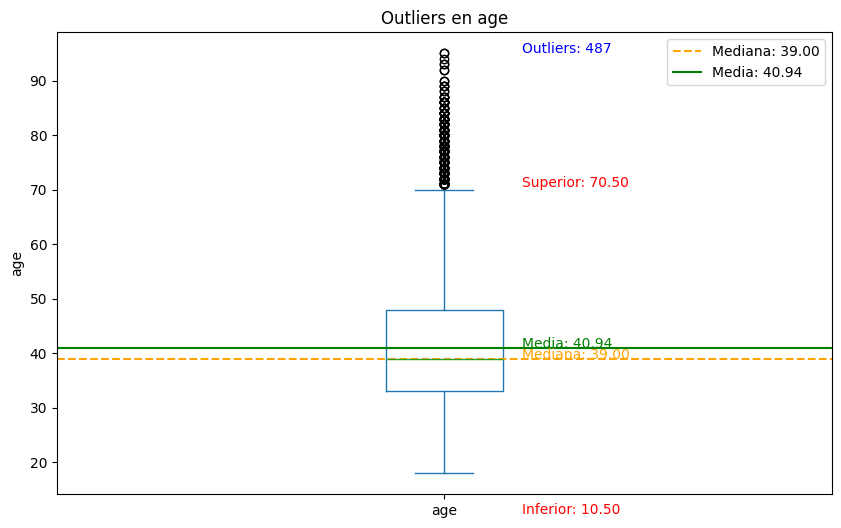

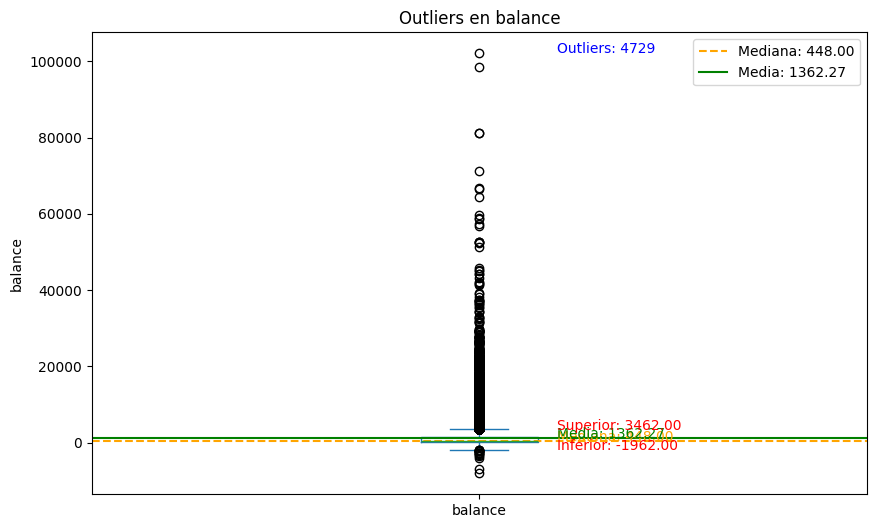

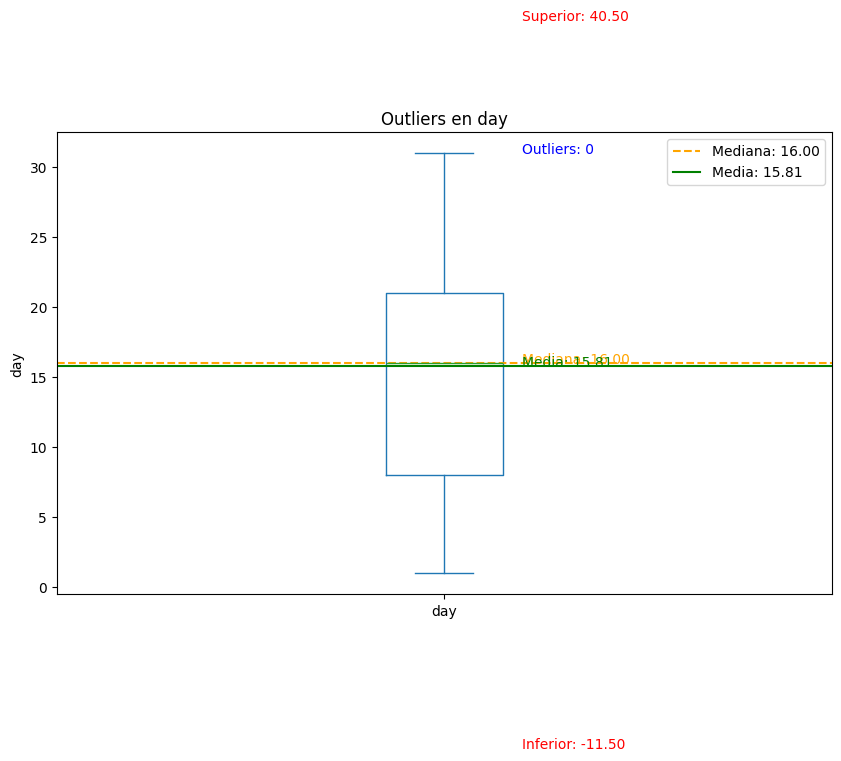

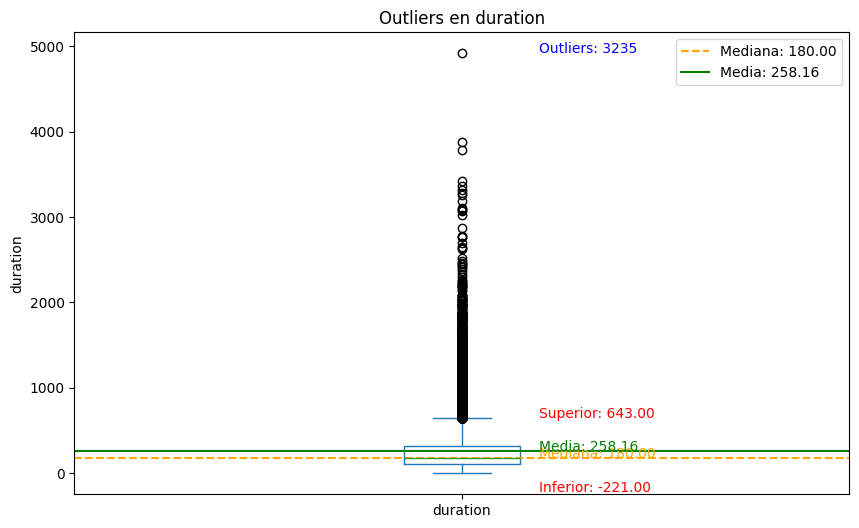

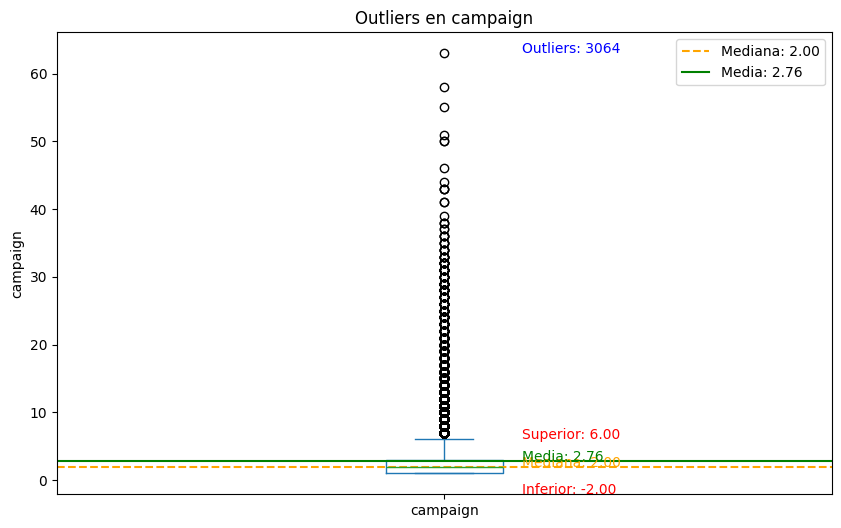

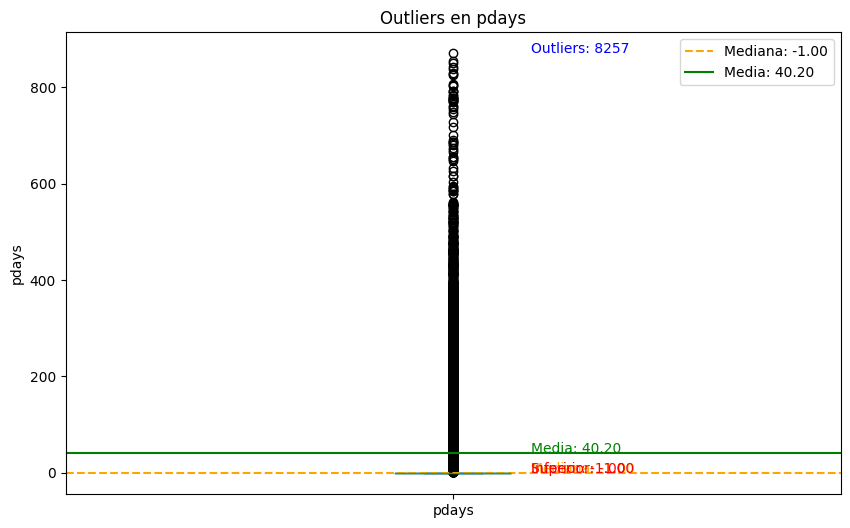

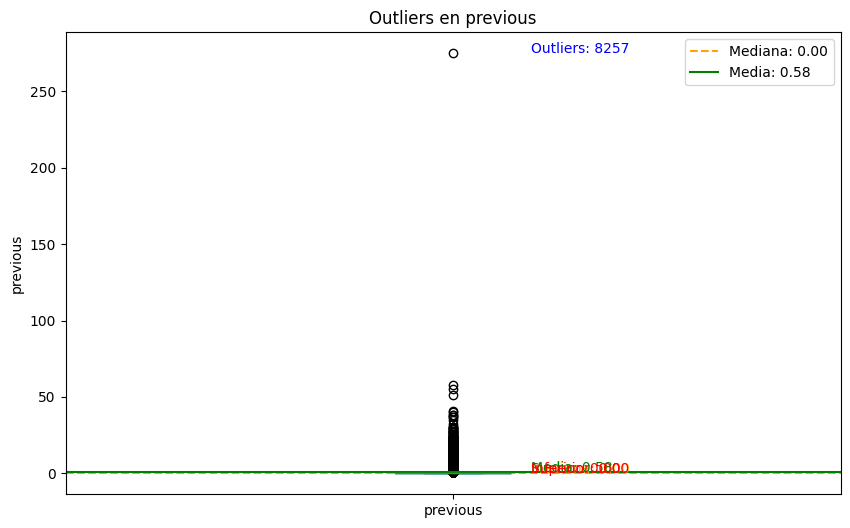

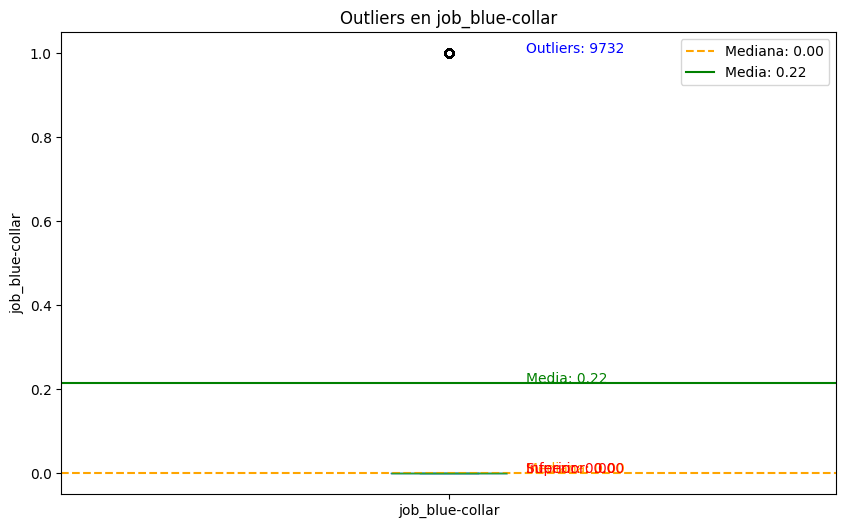

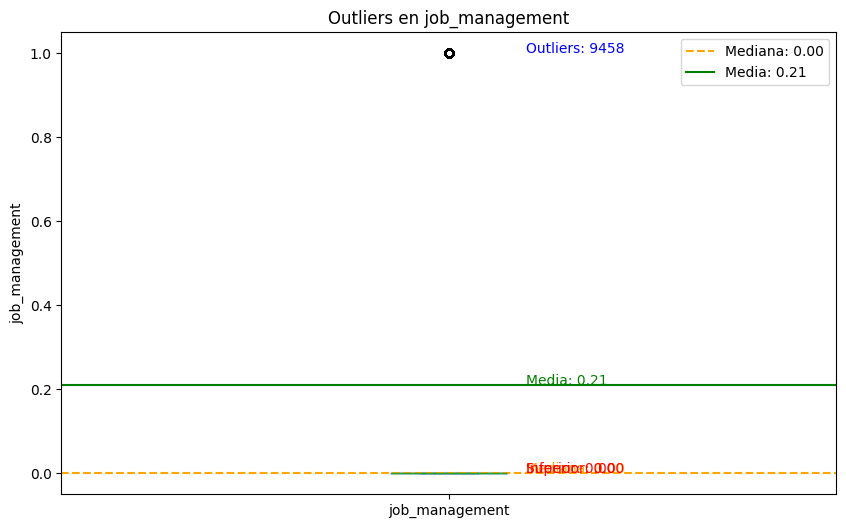

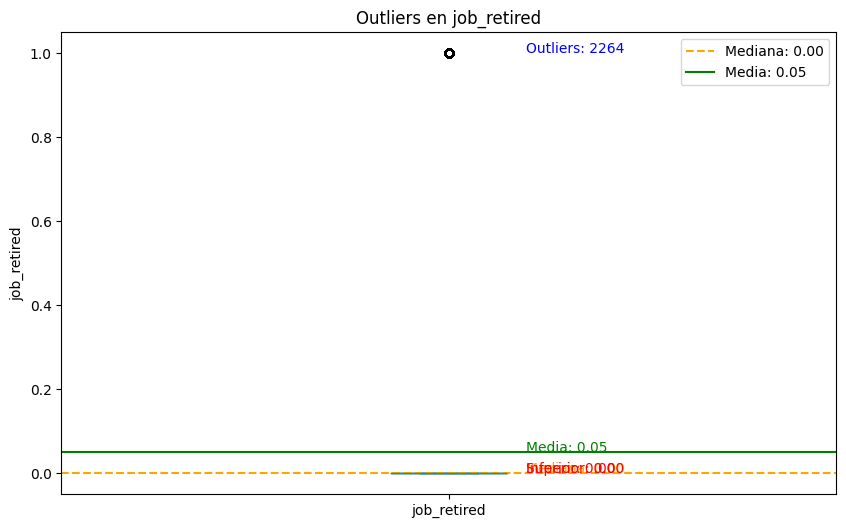

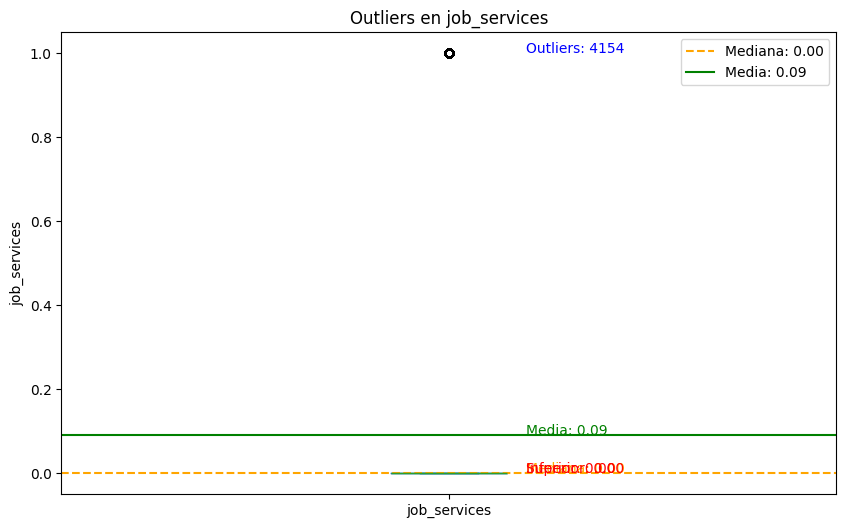

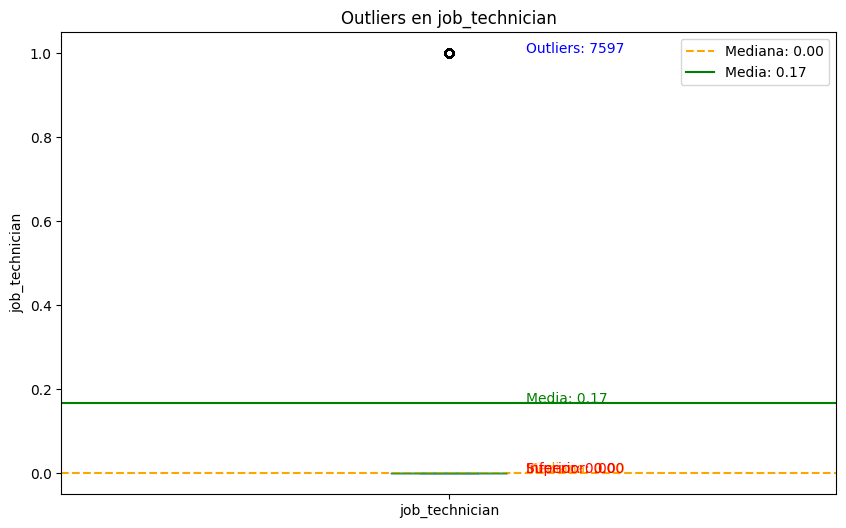

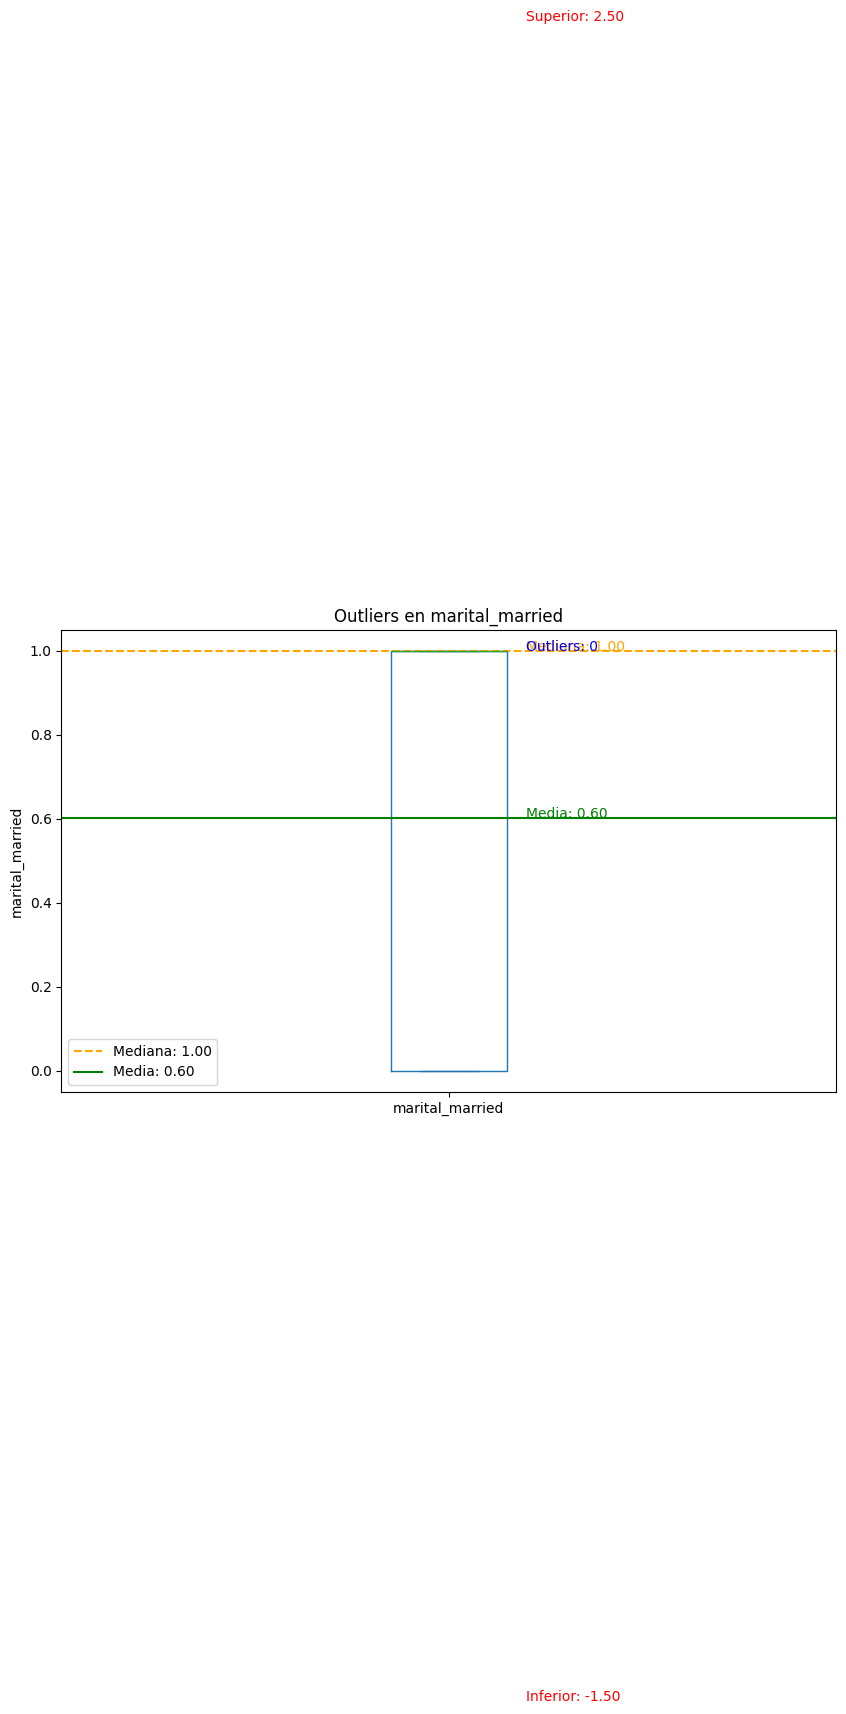

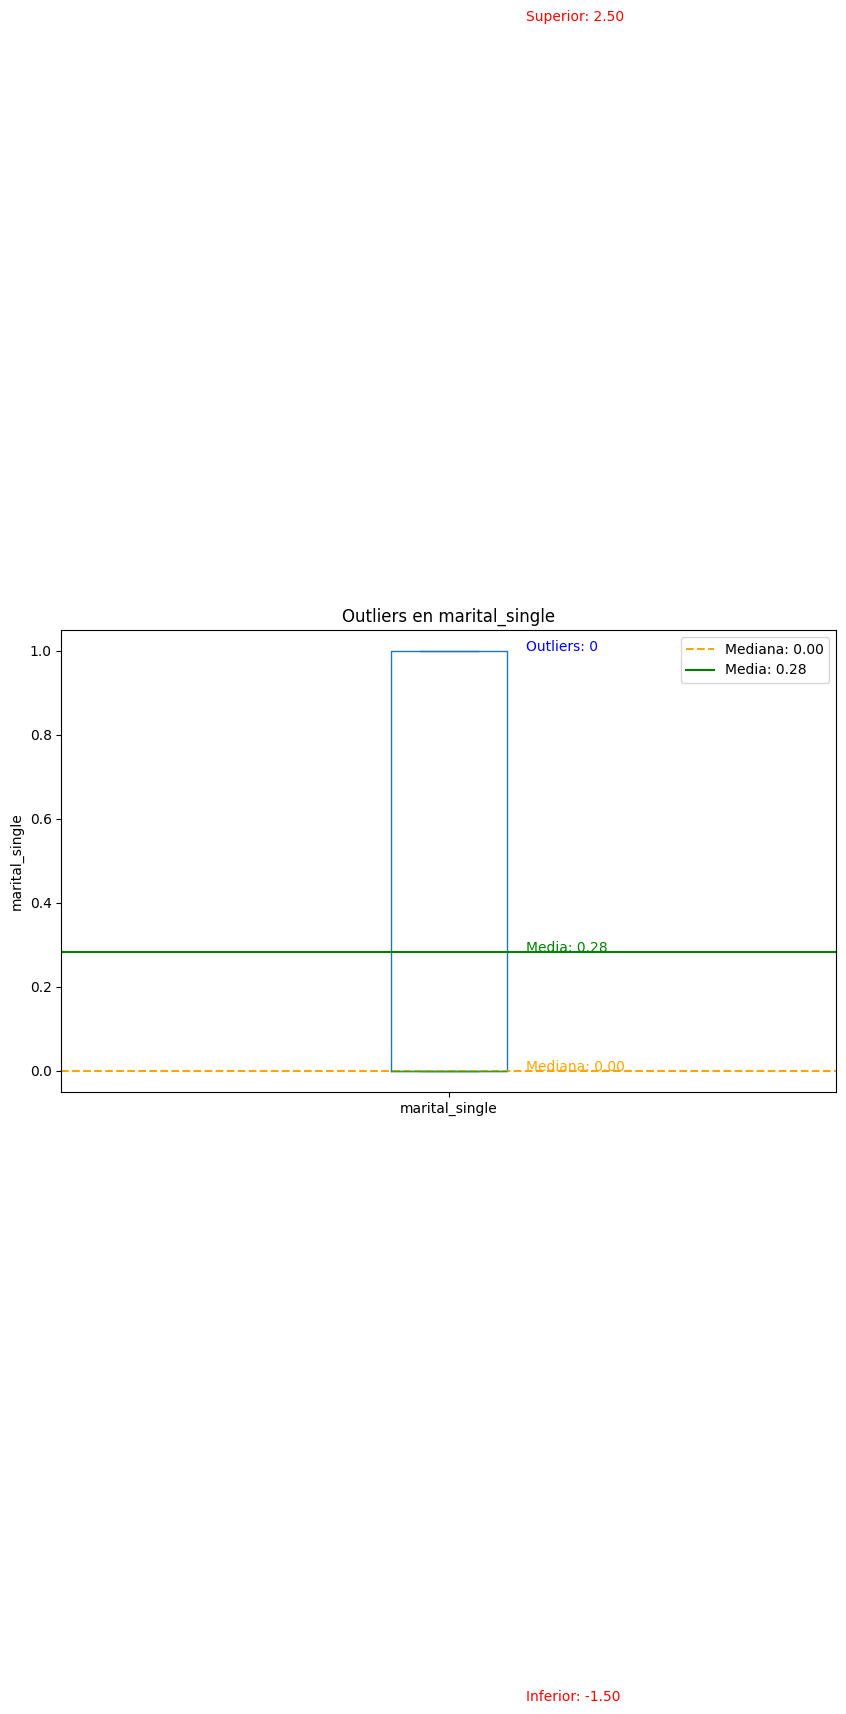

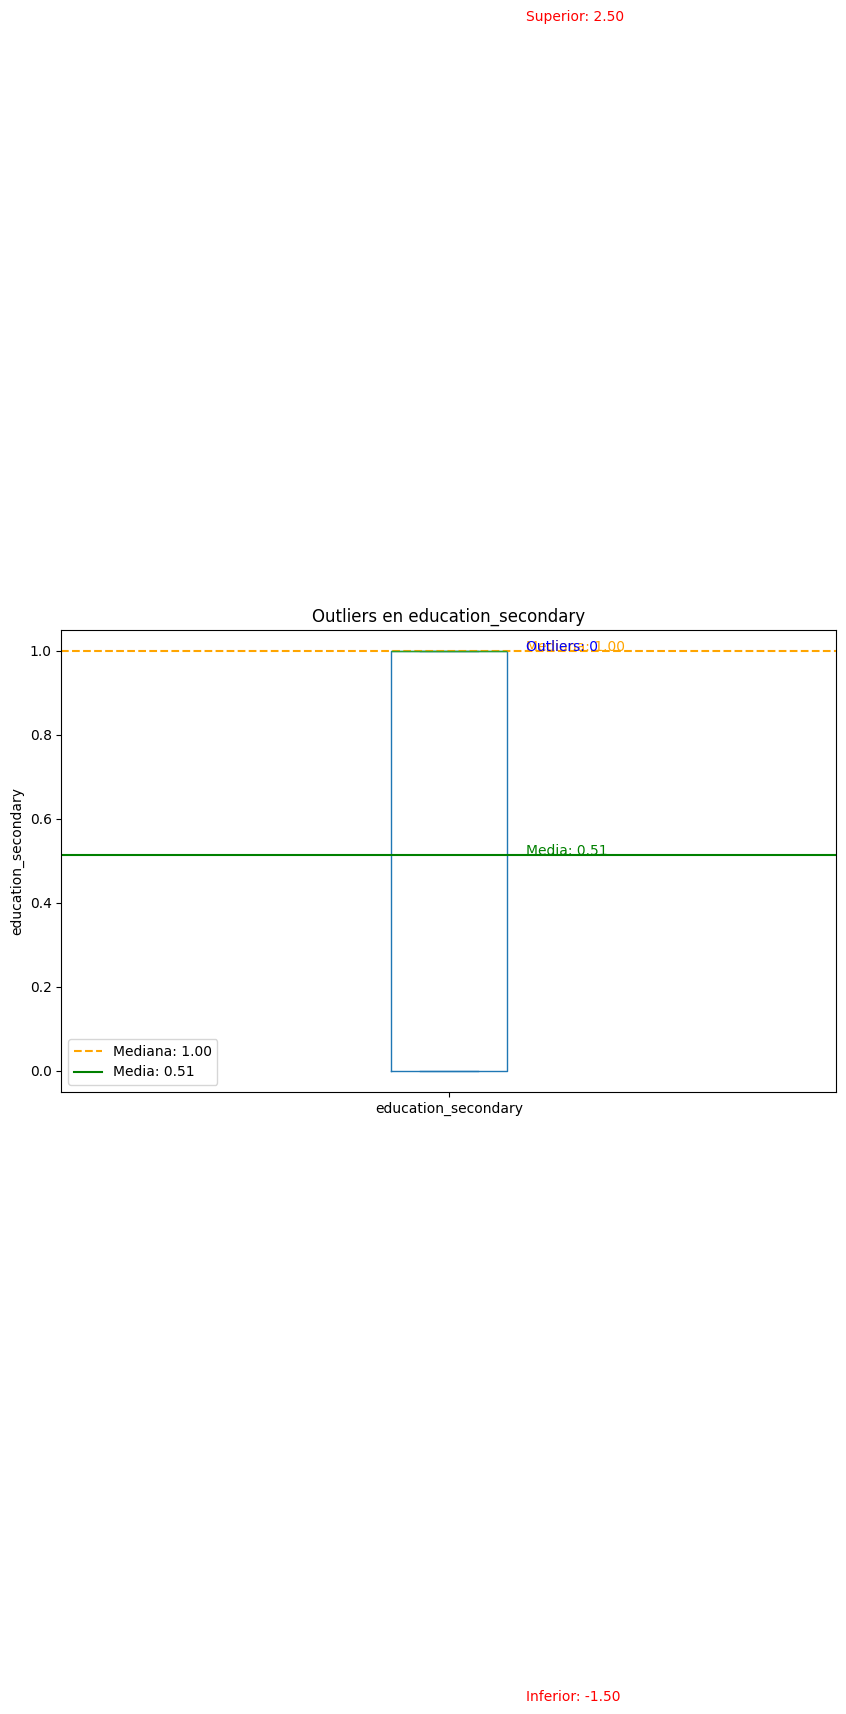

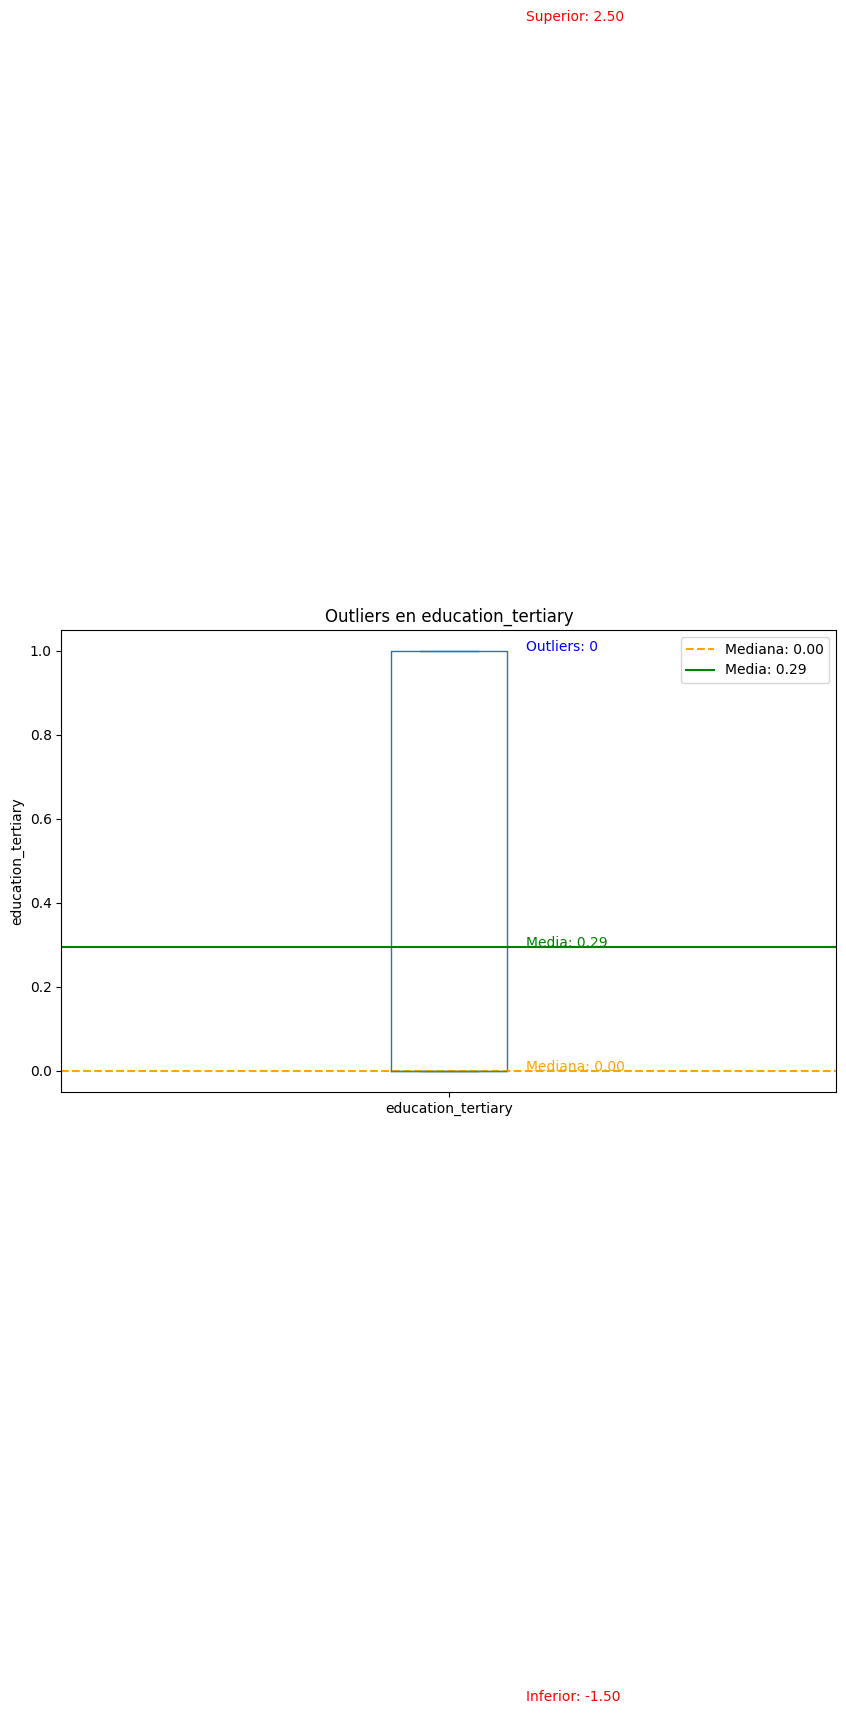

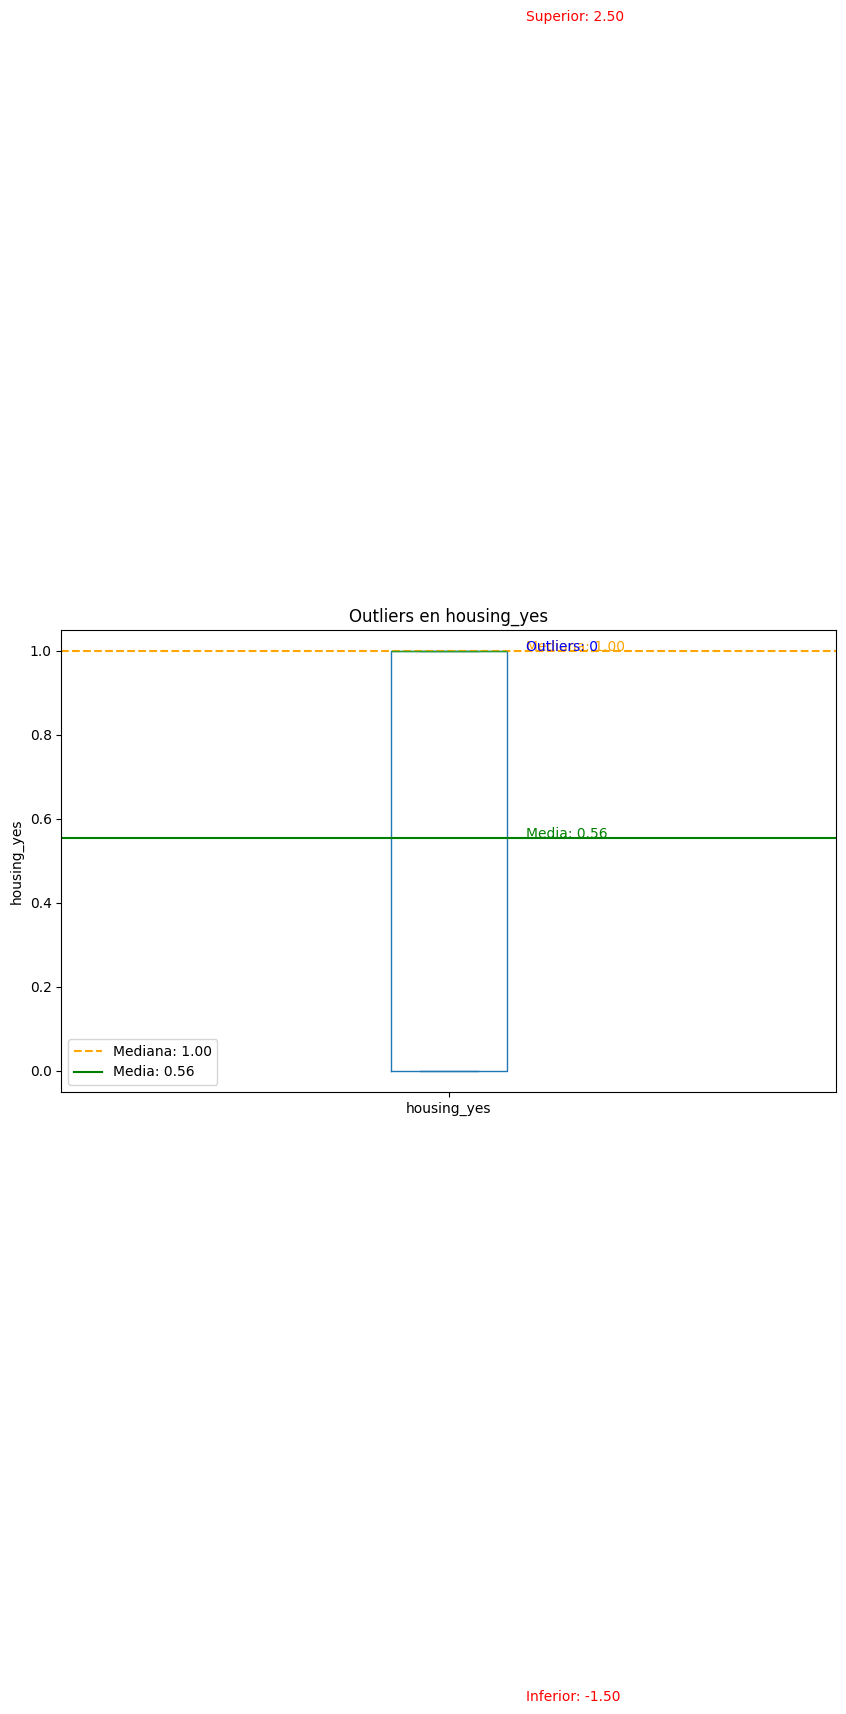

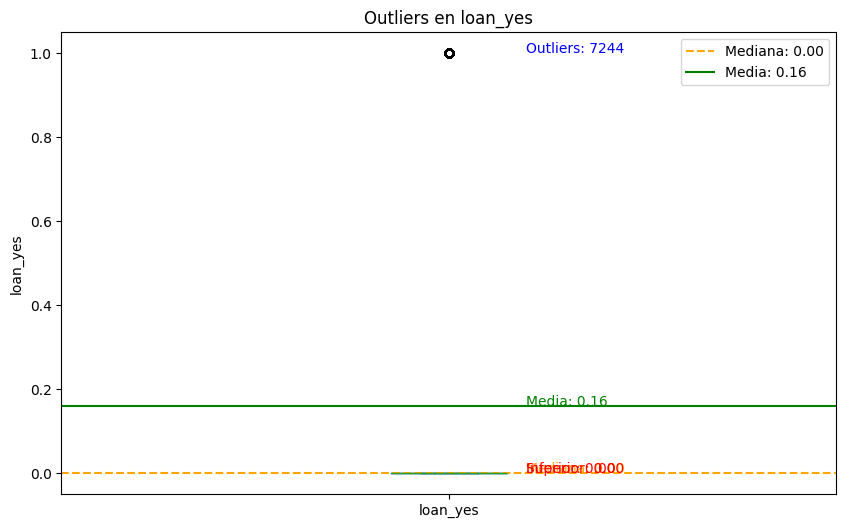

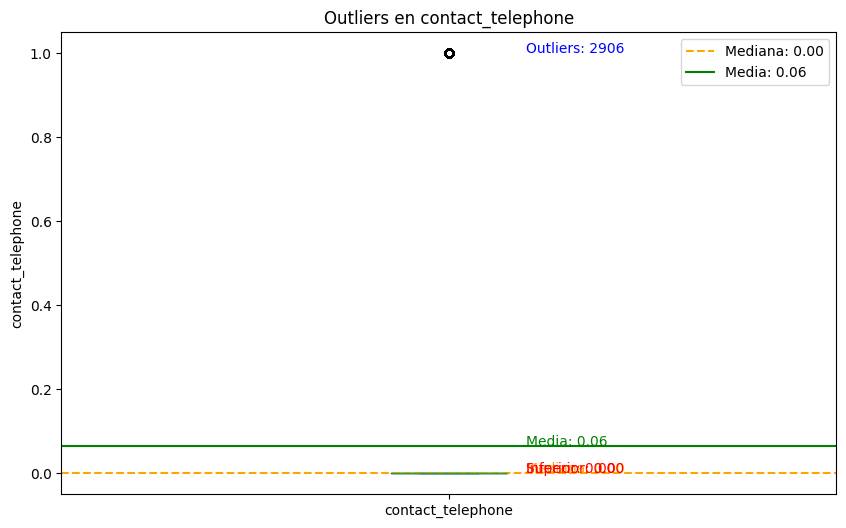

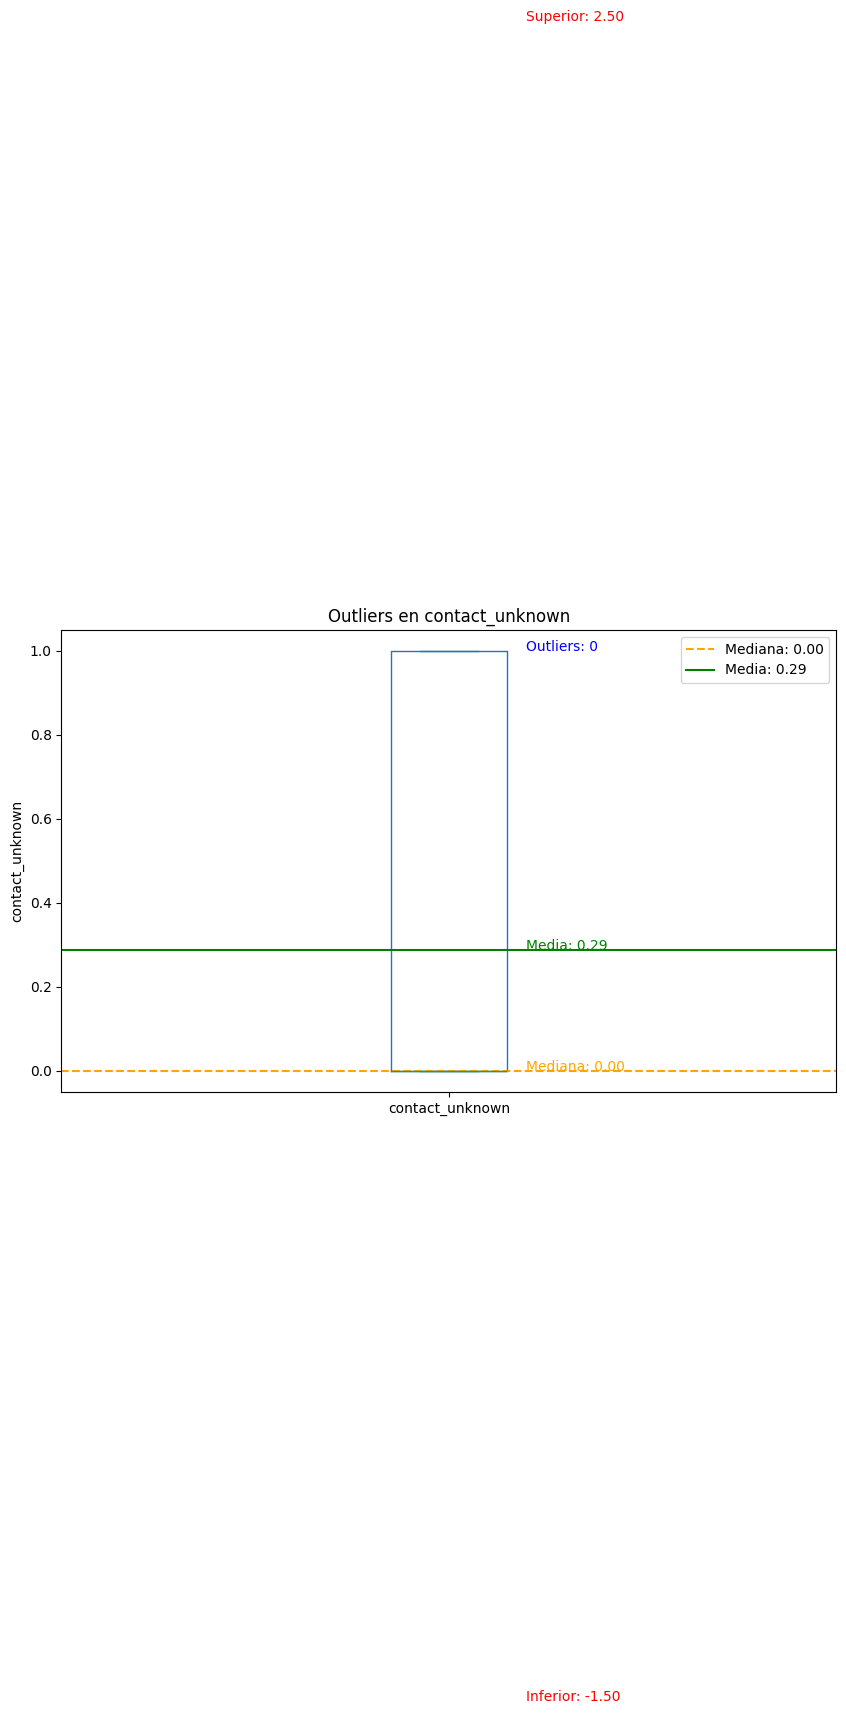

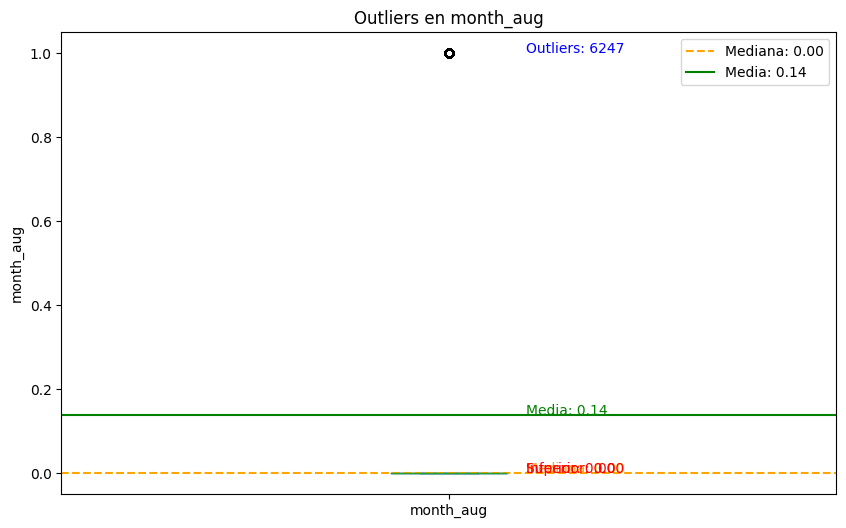

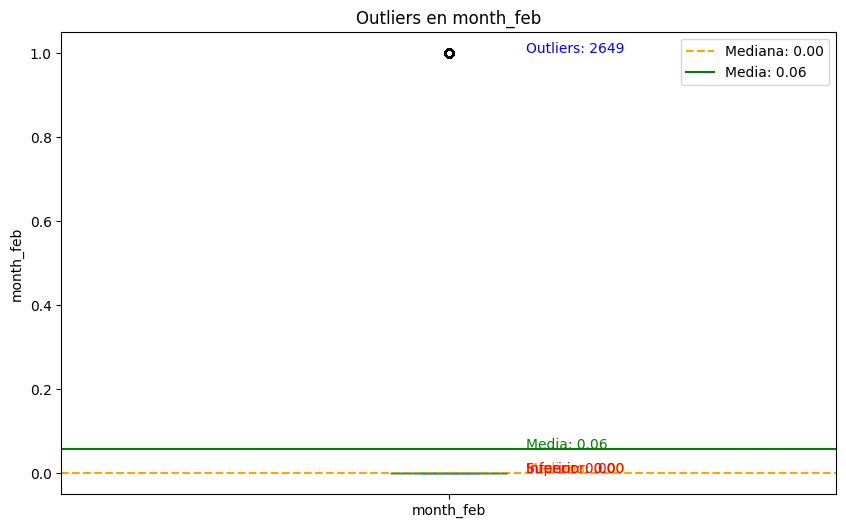

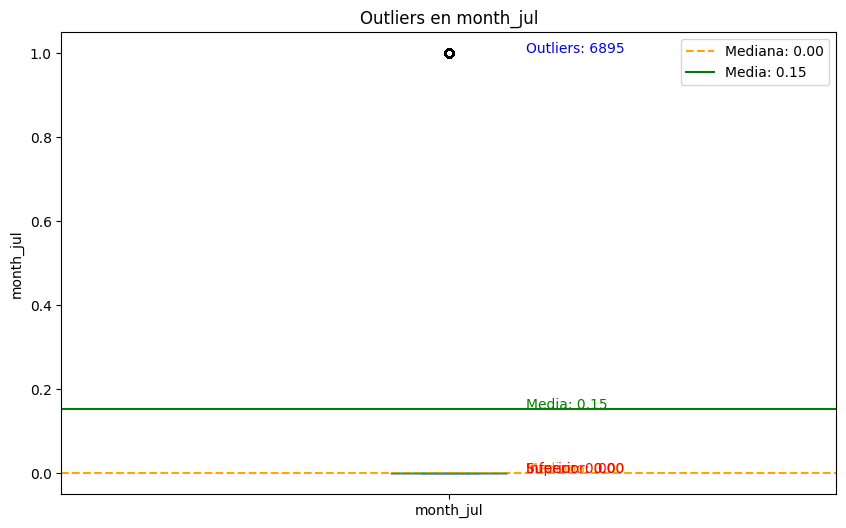

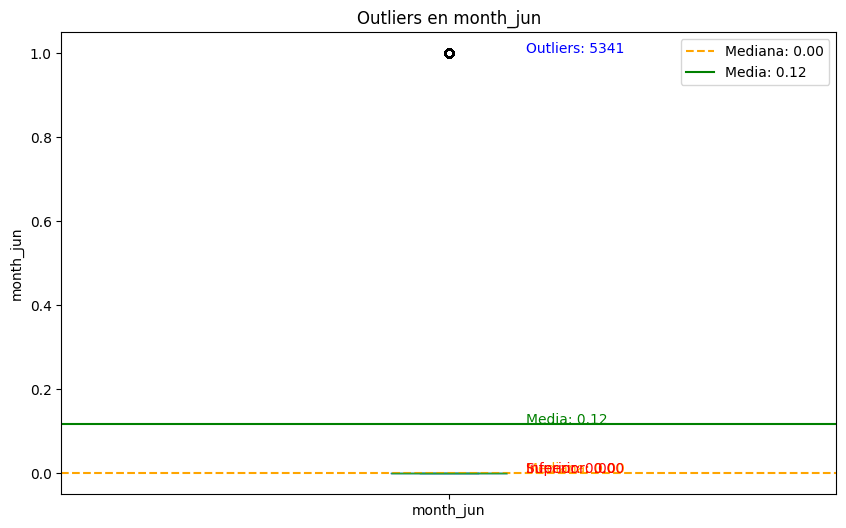

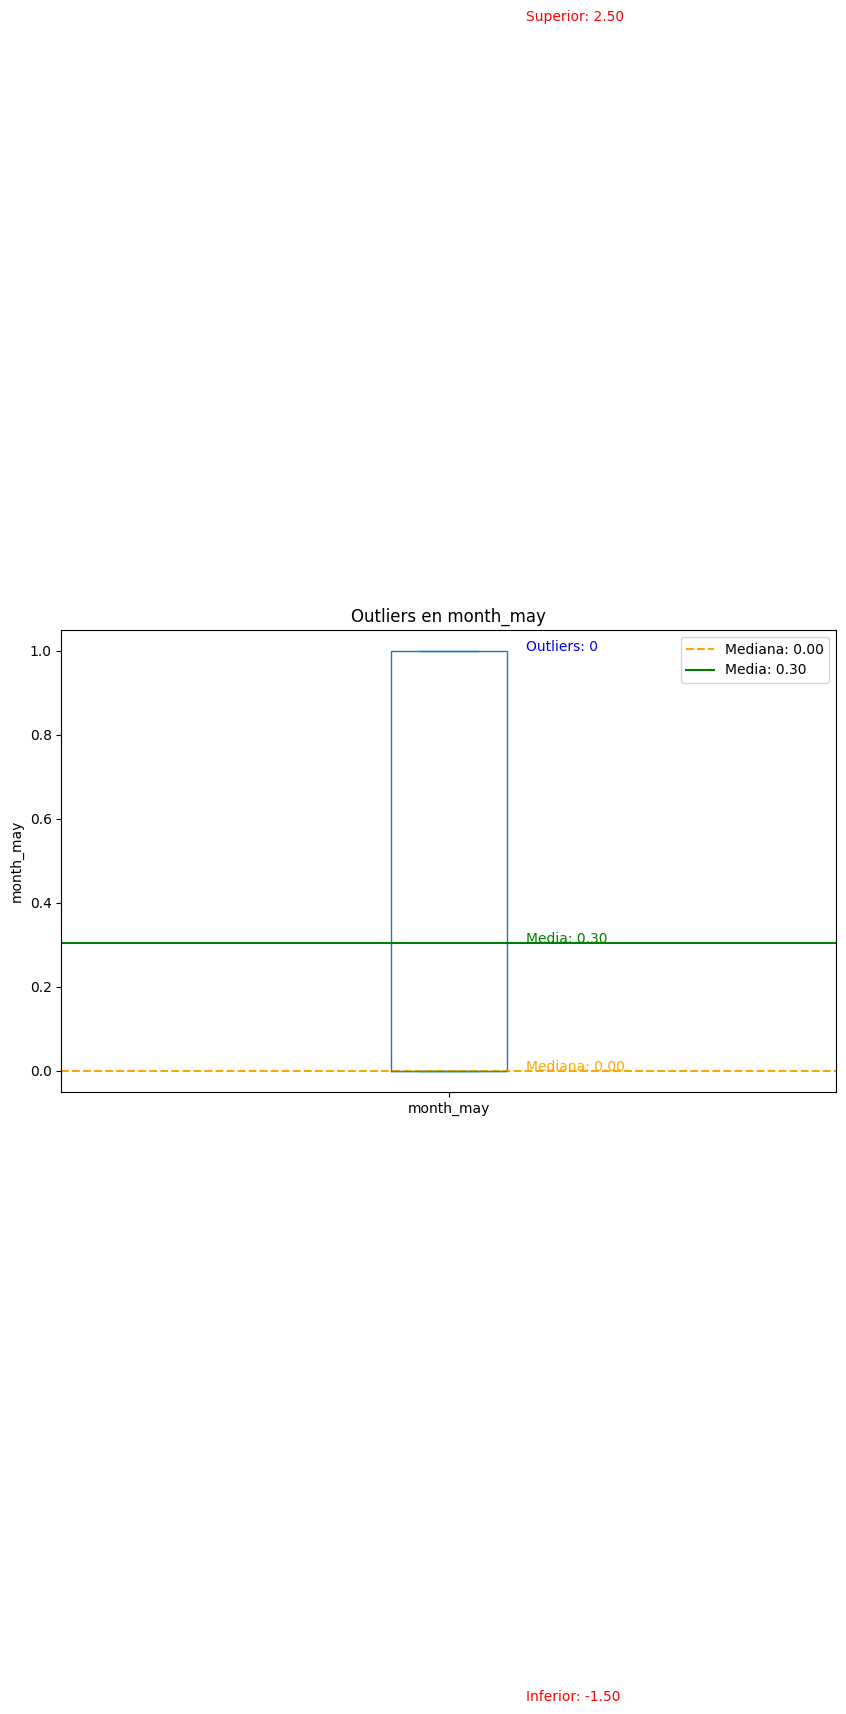

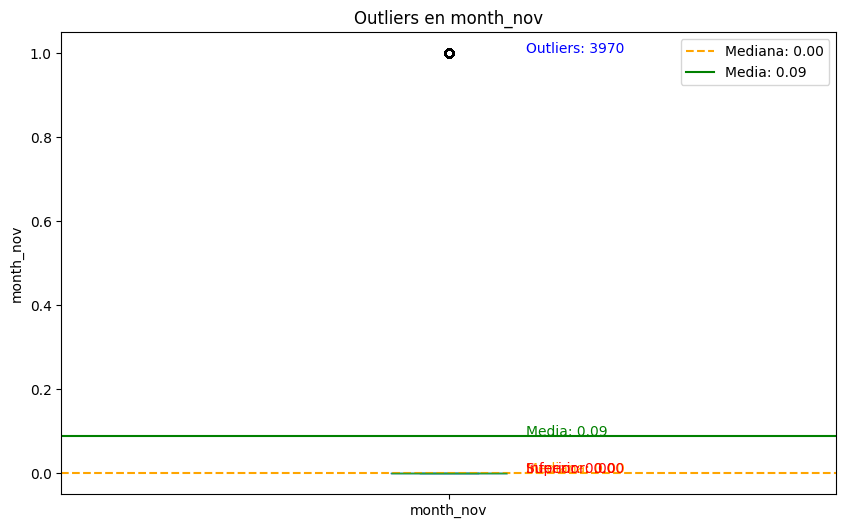

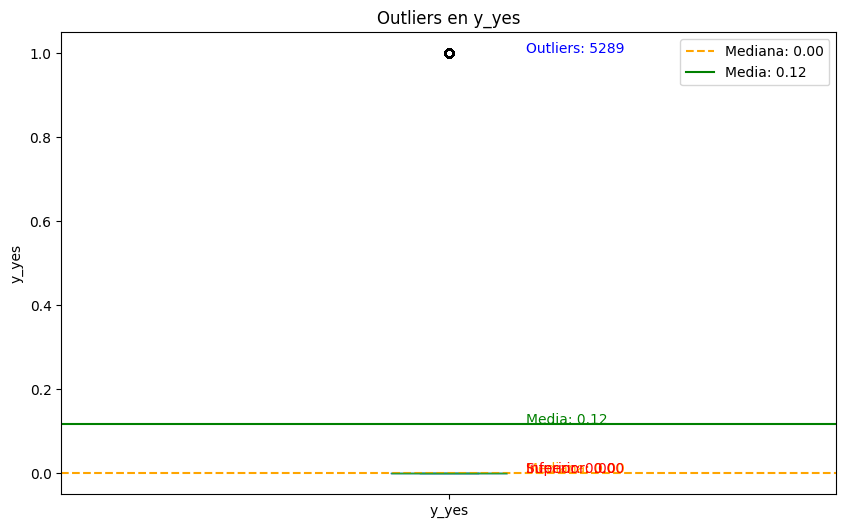

{'age': (10.5, 70.5, 487), 'balance': (-1962.0, 3462.0, 4729), 'day': (-11.5, 40.5, 0), 'duration': (-221.0, 643.0, 3235), 'campaign': (-2.0, 6.0, 3064), 'pdays': (-1.0, -1.0, 8257), 'previous': (0.0, 0.0, 8257), 'job_blue-collar': (0.0, 0.0, 9732), 'job_management': (0.0, 0.0, 9458), 'job_retired': (0.0, 0.0, 2264), 'job_services': (0.0, 0.0, 4154), 'job_technician': (0.0, 0.0, 7597), 'marital_married': (-1.5, 2.5, 0), 'marital_single': (-1.5, 2.5, 0), 'education_secondary': (-1.5, 2.5, 0), 'education_tertiary': (-1.5, 2.5, 0), 'housing_yes': (-1.5, 2.5, 0), 'loan_yes': (0.0, 0.0, 7244), 'contact_telephone': (0.0, 0.0, 2906), 'contact_unknown': (-1.5, 2.5, 0), 'month_aug': (0.0, 0.0, 6247), 'month_feb': (0.0, 0.0, 2649), 'month_jul': (0.0, 0.0, 6895), 'month_jun': (0.0, 0.0, 5341), 'month_may': (-1.5, 2.5, 0), 'month_nov': (0.0, 0.0, 3970), 'y_yes': (0.0, 0.0, 5289)}


In [14]:
outliers = {}
X=df_dummies

for i in X.columns:
    plt.figure(figsize=(10, 6))
    ax = X[i].plot(kind='box', title=f'Outliers en {i}', ylabel=i)
    
    # Cálculo de la mediana y la media
    median = X[i].median()
    mean = X[i].mean()
    
    # Límites de los cuartiles
    Q1 = X[i].quantile(0.25)
    Q3 = X[i].quantile(0.75)
    IQR = Q3 - Q1

    # Límites de los outliers
    inf = Q1 - 1.5 * IQR
    sup = Q3 + 1.5 * IQR
    
    # Conteo de outliers
    outliers_count = X[(X[i] < inf) | (X[i] > sup)][i].count()

    # Agregar la información al diccionario de outliers
    outliers[i] = (float(inf), float(sup), outliers_count)

    # Anotaciones en el plot
    plt.axhline(y=median, color='orange', linestyle='--', label=f'Mediana: {median:.2f}')
    plt.axhline(y=mean, color='green', linestyle='-', label=f'Media: {mean:.2f}')
    plt.text(x=1.1, y=median, s=f'Mediana: {median:.2f}', color='orange')
    plt.text(x=1.1, y=mean, s=f'Media: {mean:.2f}', color='green')
    plt.text(x=1.1, y=sup, s=f'Superior: {sup:.2f}', color='red')
    plt.text(x=1.1, y=inf, s=f'Inferior: {inf:.2f}', color='red')
    plt.text(x=1.1, y=max(X[i]), s=f'Outliers: {outliers_count}', color='blue')

    plt.legend()
    plt.show()

print(outliers)

Eliminación campaing

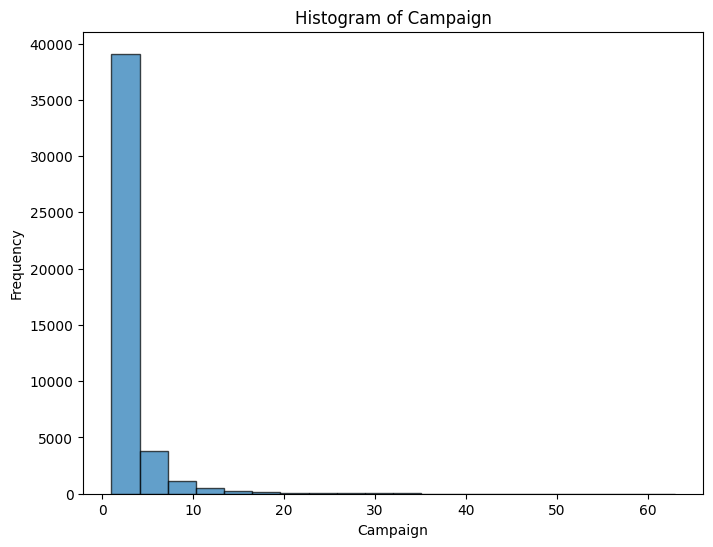

In [15]:
# Graficar el histograma de la variable 'campaign'
plt.figure(figsize=(8, 6))
plt.hist(df_dummies['campaign'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Campaign')
plt.xlabel('Campaign')
plt.ylabel('Frequency')
plt.show()

In [16]:
eliminarca = []  

columnas_eliminar=["campaign"] 

for i in df_dummies[columnas_eliminar]:
    for j in range(df_dummies.shape[0]):
        if df_dummies.loc[j, i] > 15: 
            eliminarca.append(j)

eliminarca=list(set(eliminarca))
print(eliminarca)

df_clean = df_dummies.drop(index=eliminarca)
df_clean = df_clean.reset_index(drop=True)

print(f"Filas eliminadas: {len(eliminarca)}")
print(df_clean.shape)
df_clean

[22530, 18435, 10246, 10249, 18462, 30750, 10276, 18476, 8238, 22576, 18487, 22590, 30791, 18513, 8280, 20576, 16481, 8300, 8303, 6264, 18555, 16520, 8342, 22678, 16540, 18592, 18599, 18600, 16553, 18602, 18603, 22697, 14509, 18607, 4275, 18612, 10421, 18613, 18615, 18616, 18618, 18619, 18621, 18622, 18623, 30917, 18631, 18632, 18634, 4299, 18635, 18637, 18638, 22734, 18640, 18645, 18652, 10466, 18658, 18660, 18661, 18663, 4330, 18667, 18668, 4334, 10479, 18670, 4338, 18675, 22772, 18678, 18679, 22777, 16637, 18686, 22782, 22788, 18693, 18696, 18697, 18698, 18703, 18704, 22800, 18709, 18713, 18724, 18729, 22826, 10539, 18738, 18739, 18740, 10238, 18744, 18745, 18747, 18749, 18750, 31039, 8512, 18760, 18764, 18774, 18777, 18778, 18782, 22878, 8544, 8547, 18787, 10597, 18788, 22886, 31076, 18795, 18798, 18799, 22894, 20855, 10616, 8574, 22911, 18816, 18817, 18820, 22916, 22917, 6544, 22928, 12690, 31136, 22950, 8621, 10674, 16830, 8641, 22979, 10692, 22981, 16839, 10697, 10698, 22998, 23

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_management,job_retired,...,loan_yes,contact_telephone,contact_unknown,month_aug,month_feb,month_jul,month_jun,month_may,month_nov,y_yes
0,58,2143,5,261,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,33,2,5,76,1,-1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44676,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
44677,71,1729,17,456,2,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
44678,72,5715,17,1127,5,184,3,0,0,1,...,0,0,0,0,0,0,0,0,1,1
44679,57,668,17,508,4,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


Eliminación previous

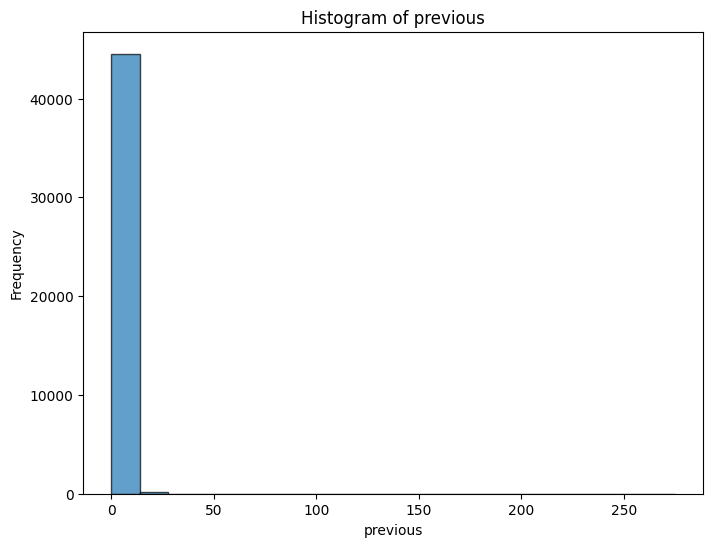

In [17]:
# Graficar el histograma de la variable 'previous'
plt.figure(figsize=(8, 6))
plt.hist(df_clean['previous'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of previous')
plt.xlabel('previous')
plt.ylabel('Frequency')
plt.show()

In [18]:
eliminarprev = []  

columnas_eliminar=["previous"] 

for i in df_clean[columnas_eliminar]:
    for j in range(df_clean.shape[0]):
        if df_clean.loc[j, i] > 25: 
            eliminarprev.append(j)

eliminarprev=list(set(eliminarprev))
print(eliminarprev)

df_clean = df_clean.drop(index=eliminarprev)
df_clean = df_clean.reset_index(drop=True)

print(f"Filas eliminadas: {len(eliminarprev)}")
print(df_clean.shape)
df_clean

[44292, 35591, 37643, 29973, 27672, 26138, 28065, 37539, 26149, 37797, 41893, 43560, 37038, 38322, 40114, 43955, 43450, 42813, 27979, 28367, 38612, 36183, 35037, 42082, 29805, 27120, 28663, 30078]
Filas eliminadas: 28
(44653, 27)


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_management,job_retired,...,loan_yes,contact_telephone,contact_unknown,month_aug,month_feb,month_jul,month_jun,month_may,month_nov,y_yes
0,58,2143,5,261,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,33,2,5,76,1,-1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44648,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
44649,71,1729,17,456,2,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
44650,72,5715,17,1127,5,184,3,0,0,1,...,0,0,0,0,0,0,0,0,1,1
44651,57,668,17,508,4,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


Eliminación duration

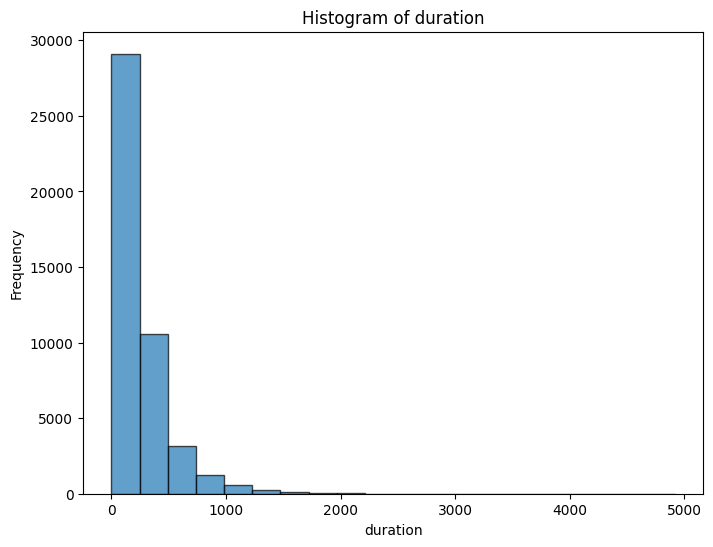

In [19]:
# Graficar el histograma de la variable 'duration'
plt.figure(figsize=(8, 6))
plt.hist(df_dummies['duration'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of duration')
plt.xlabel('duration')
plt.ylabel('Frequency')
plt.show()

In [20]:
eliminardur = []  

columnas_eliminar=["duration"] 

for i in df_clean[columnas_eliminar].columns:
    for j in range(df_clean.shape[0]):
        inf, sup, z = outliers[i]
        if df_clean.loc[j, i] < inf or df_clean.loc[j,i] > sup : 
            eliminardur.append(j)

eliminardur=list(set(eliminardur))
print(eliminardur)

df_clean = df_clean.drop(index=eliminardur)
df_clean = df_clean.reset_index(drop=True)

print(f"Filas eliminadas: {len(eliminardur)}")
print(df_clean.shape)
print(df_clean)


[16384, 8205, 8206, 32792, 8222, 32798, 32803, 37, 16422, 16425, 43, 8236, 16429, 41010, 8243, 53, 32821, 59, 41019, 61, 41022, 41024, 41029, 8263, 24648, 16458, 41035, 8270, 41038, 83, 41044, 86, 87, 8278, 41049, 16477, 41055, 41058, 41059, 24676, 41060, 41066, 109, 16497, 41077, 16508, 8317, 16509, 16513, 130, 16517, 8326, 16518, 24716, 8334, 16527, 41104, 16529, 32915, 16532, 41107, 152, 24731, 24732, 16541, 16543, 16545, 32929, 16547, 24739, 168, 170, 41133, 32942, 179, 16564, 181, 182, 16566, 8376, 16567, 16569, 24758, 41146, 24765, 24767, 16579, 41155, 8389, 16581, 32967, 32968, 8393, 41162, 32972, 16590, 32975, 16593, 16594, 32977, 16596, 41174, 16601, 32988, 224, 16611, 41188, 231, 232, 8423, 32999, 41191, 41194, 24816, 241, 16625, 41204, 8439, 249, 16638, 33022, 8449, 16643, 24837, 41222, 8455, 16647, 41224, 24843, 8461, 16654, 271, 33038, 8465, 8466, 41235, 41236, 24854, 41239, 16664, 41246, 291, 41251, 24869, 16680, 8490, 16683, 16684, 8495, 16688, 16693, 8503, 24888, 16703,

Eliminación pdays

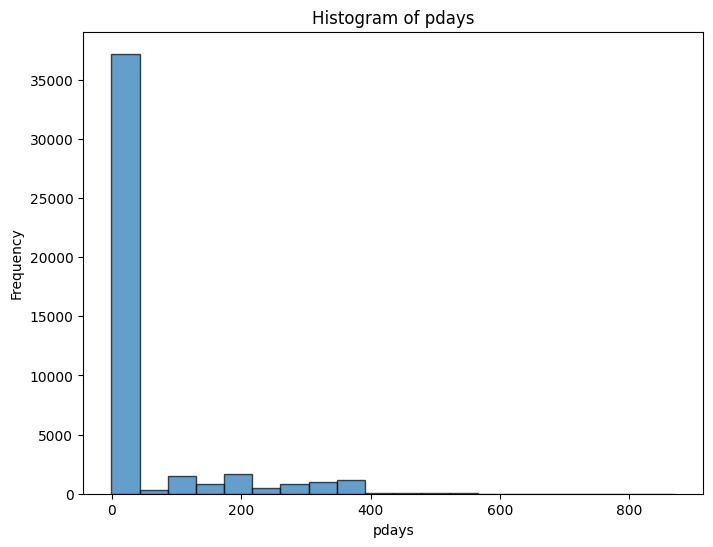

In [21]:
# Graficar el histograma de la variable 'pdays'
plt.figure(figsize=(8, 6))
plt.hist(df_dummies['pdays'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of pdays')
plt.xlabel('pdays')
plt.ylabel('Frequency')
plt.show()

In [22]:
eliminarpday = []  

columnas_eliminar=["pdays"] 

for i in df_clean[columnas_eliminar]:
    for j in range(df_clean.shape[0]):
        if df_clean.loc[j, i] > 550: 
            eliminarpday.append(j)

eliminarpday=list(set(eliminarpday))
print(eliminarpday)

df_clean = df_clean.drop(index=eliminarpday)
df_clean = df_clean.reset_index(drop=True)

print(f"Filas eliminadas: {len(eliminarpday)}")
print(df_clean.shape)
df_clean

[40832, 40960, 41088, 39555, 40581, 39430, 40071, 41096, 41350, 40844, 40972, 40335, 41103, 41106, 39189, 41109, 39831, 40216, 40728, 41110, 40219, 41375, 40352, 39458, 39463, 39466, 40875, 41261, 40366, 41008, 41272, 41273, 41400, 39357, 40893, 39743, 39616, 39872, 40130, 40768, 41149, 40775, 41037, 40142, 41166, 41048, 40283, 40543, 39777, 40930, 41060, 40550, 40806, 41065, 40171, 40299, 40428, 40557, 41199, 40945, 41204, 40181, 40821, 41077, 41080, 41213, 40187, 41085]
Filas eliminadas: 68
(41368, 27)


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_management,job_retired,...,loan_yes,contact_telephone,contact_unknown,month_aug,month_feb,month_jul,month_jun,month_may,month_nov,y_yes
0,58,2143,5,261,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,33,2,5,76,1,-1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41363,73,2850,17,300,1,40,8,0,0,1,...,0,0,0,0,0,0,0,0,1,1
41364,25,505,17,386,2,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
41365,71,1729,17,456,2,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
41366,57,668,17,508,4,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


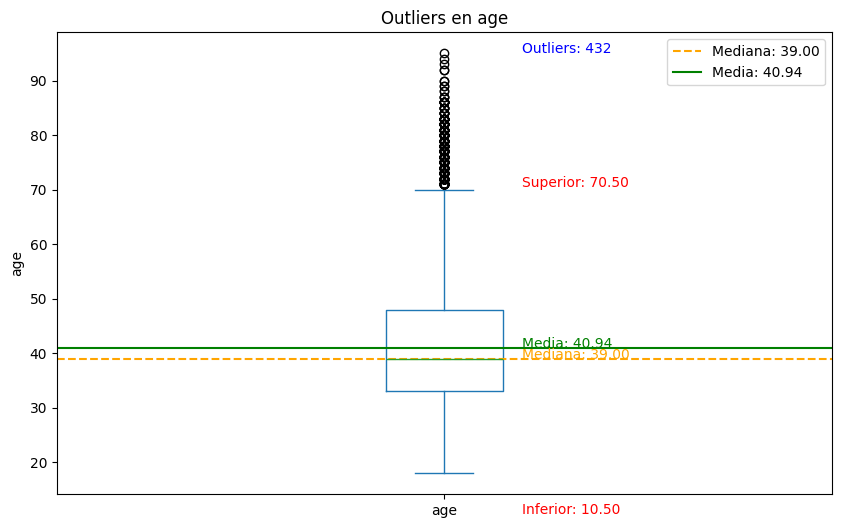

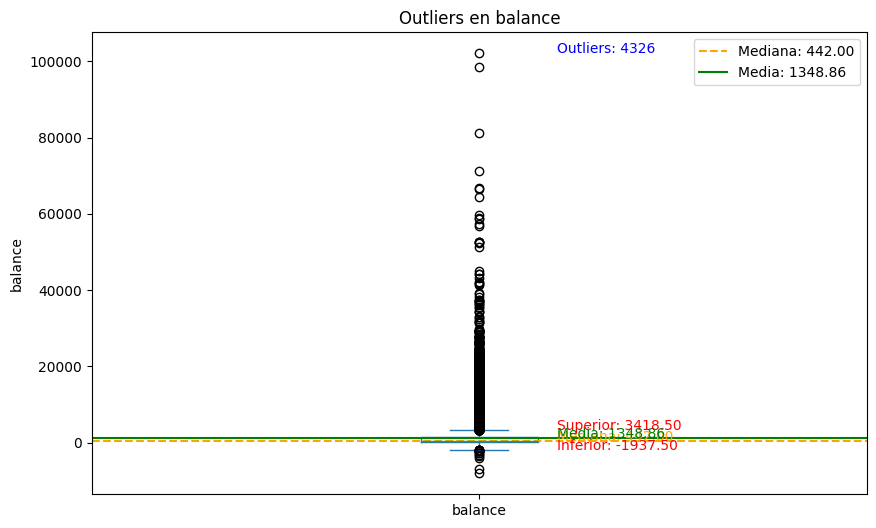

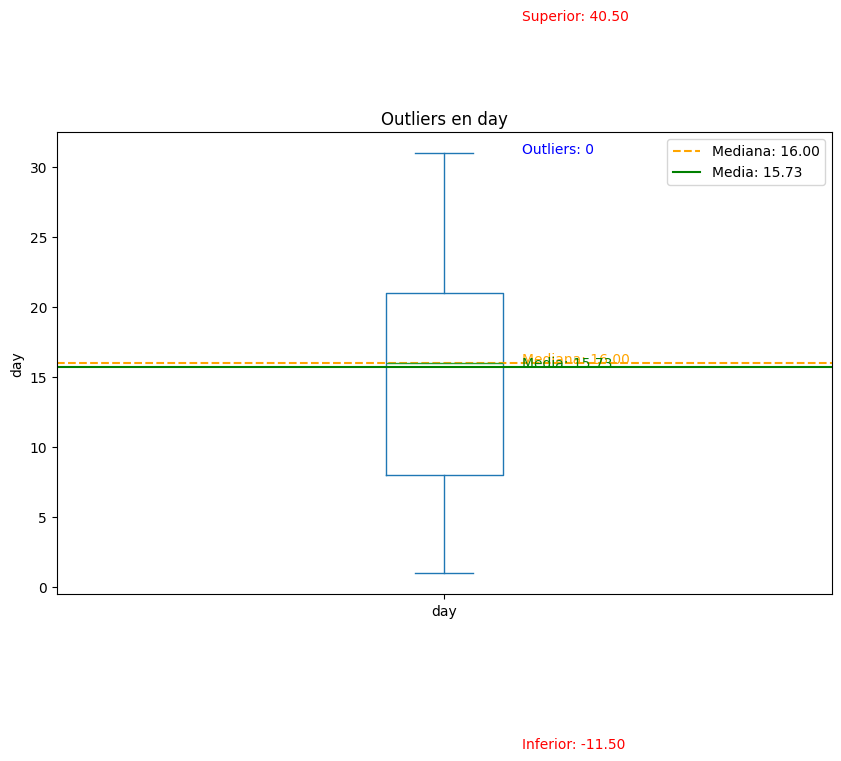

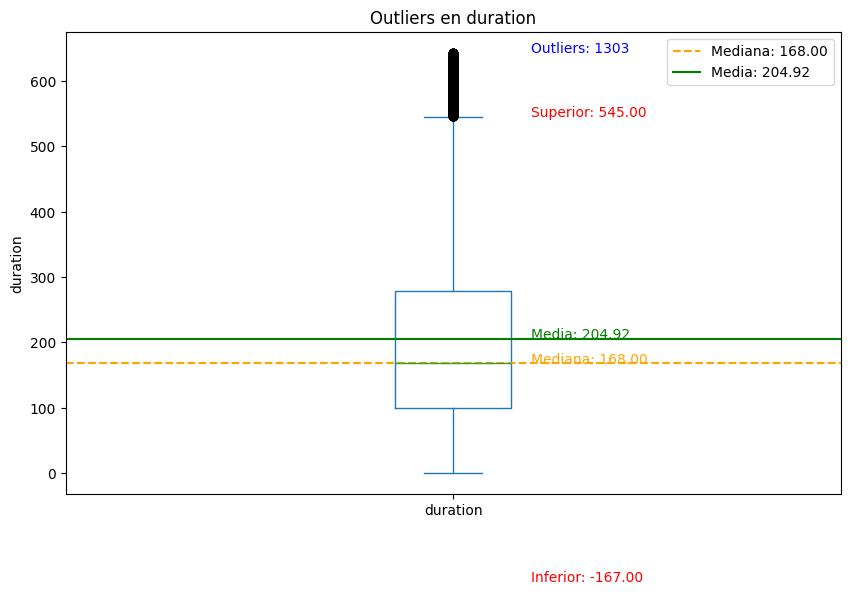

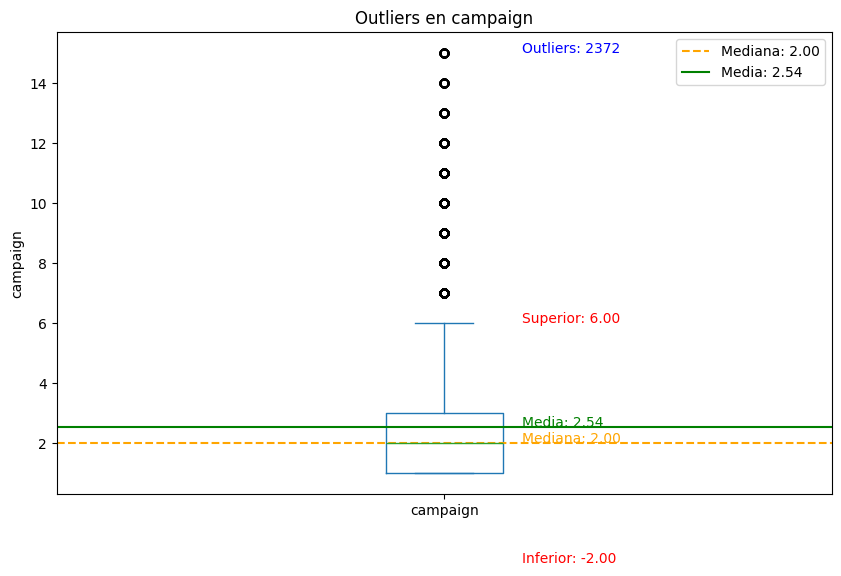

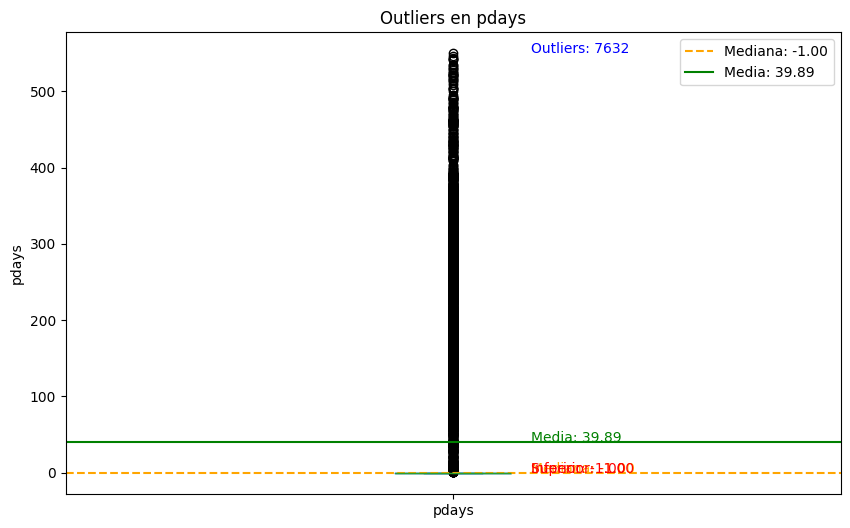

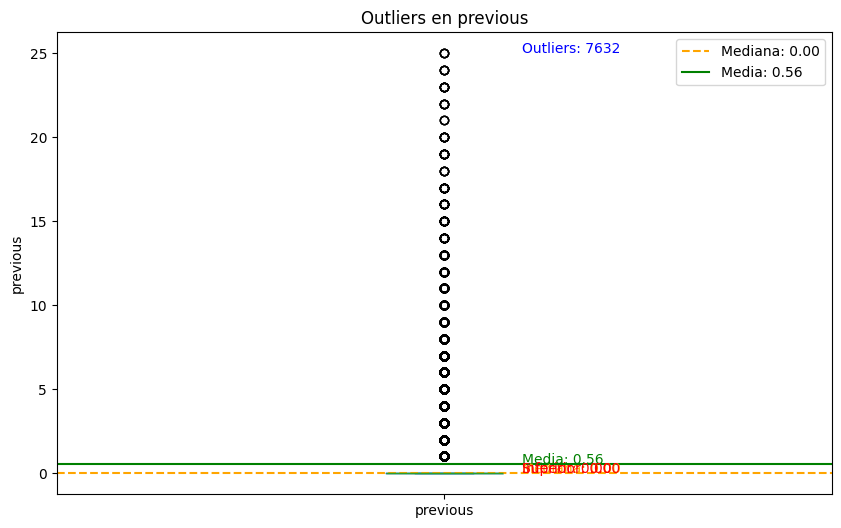

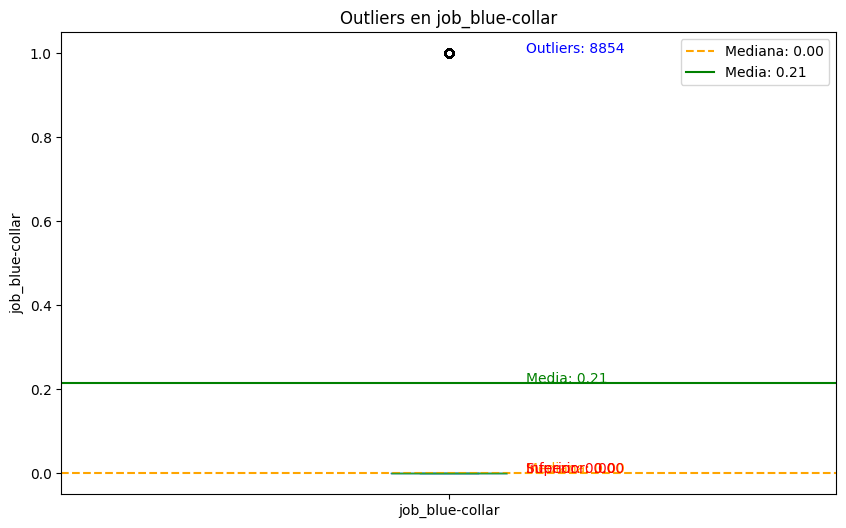

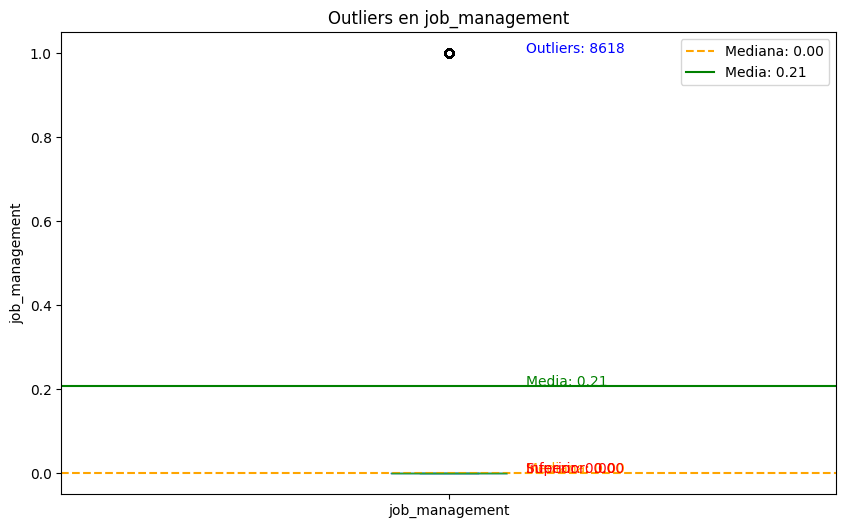

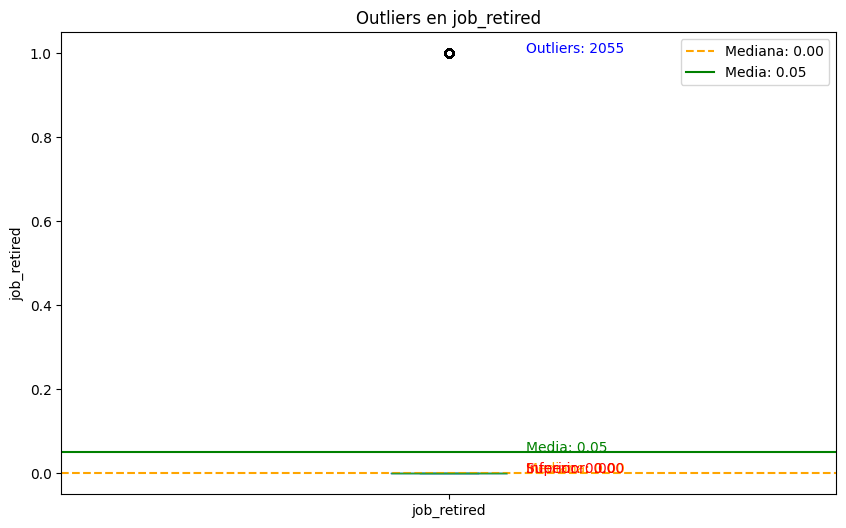

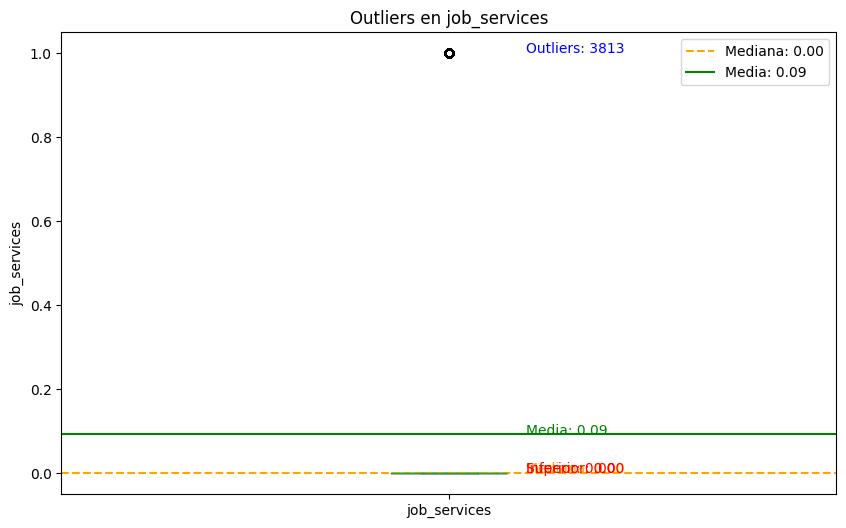

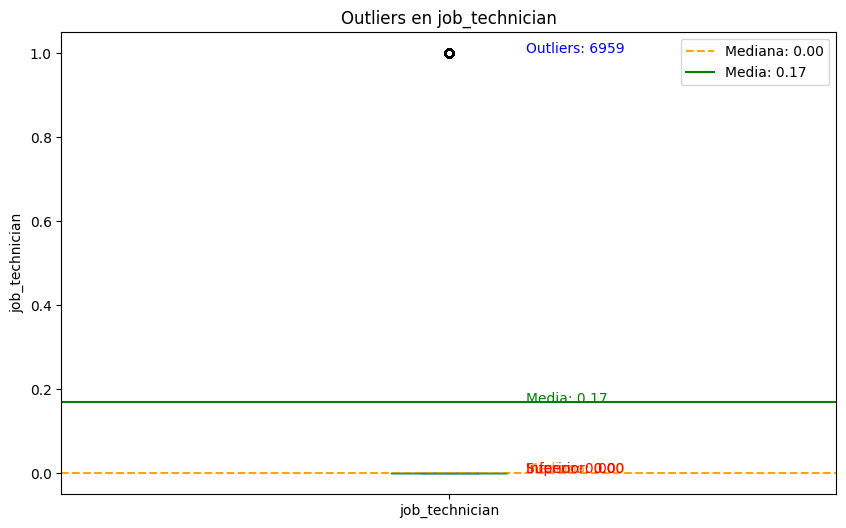

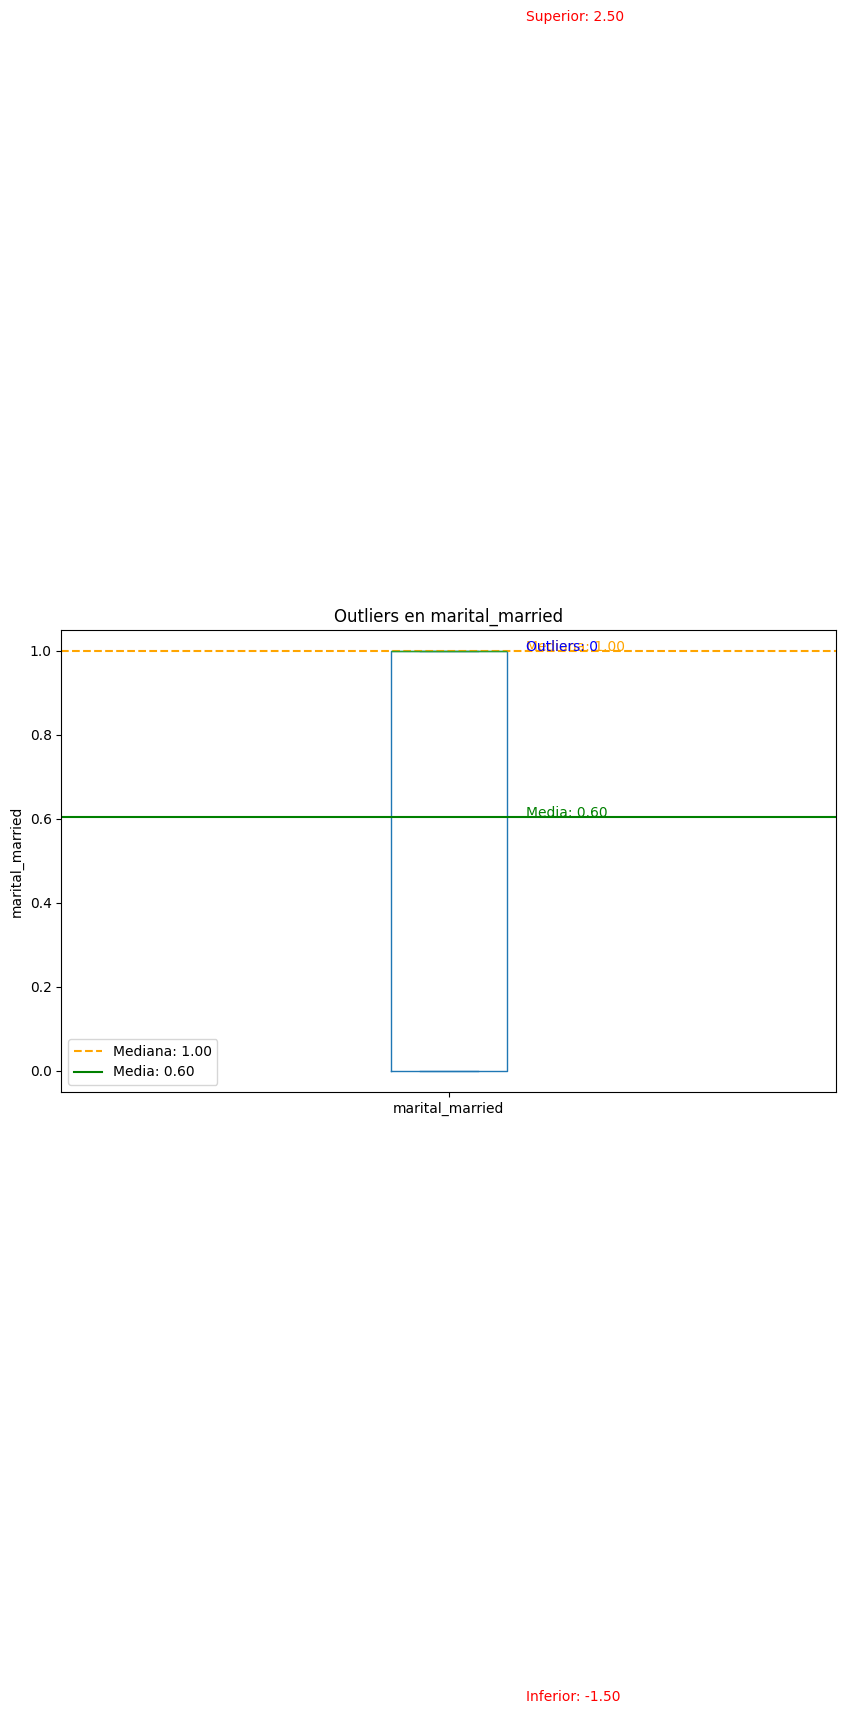

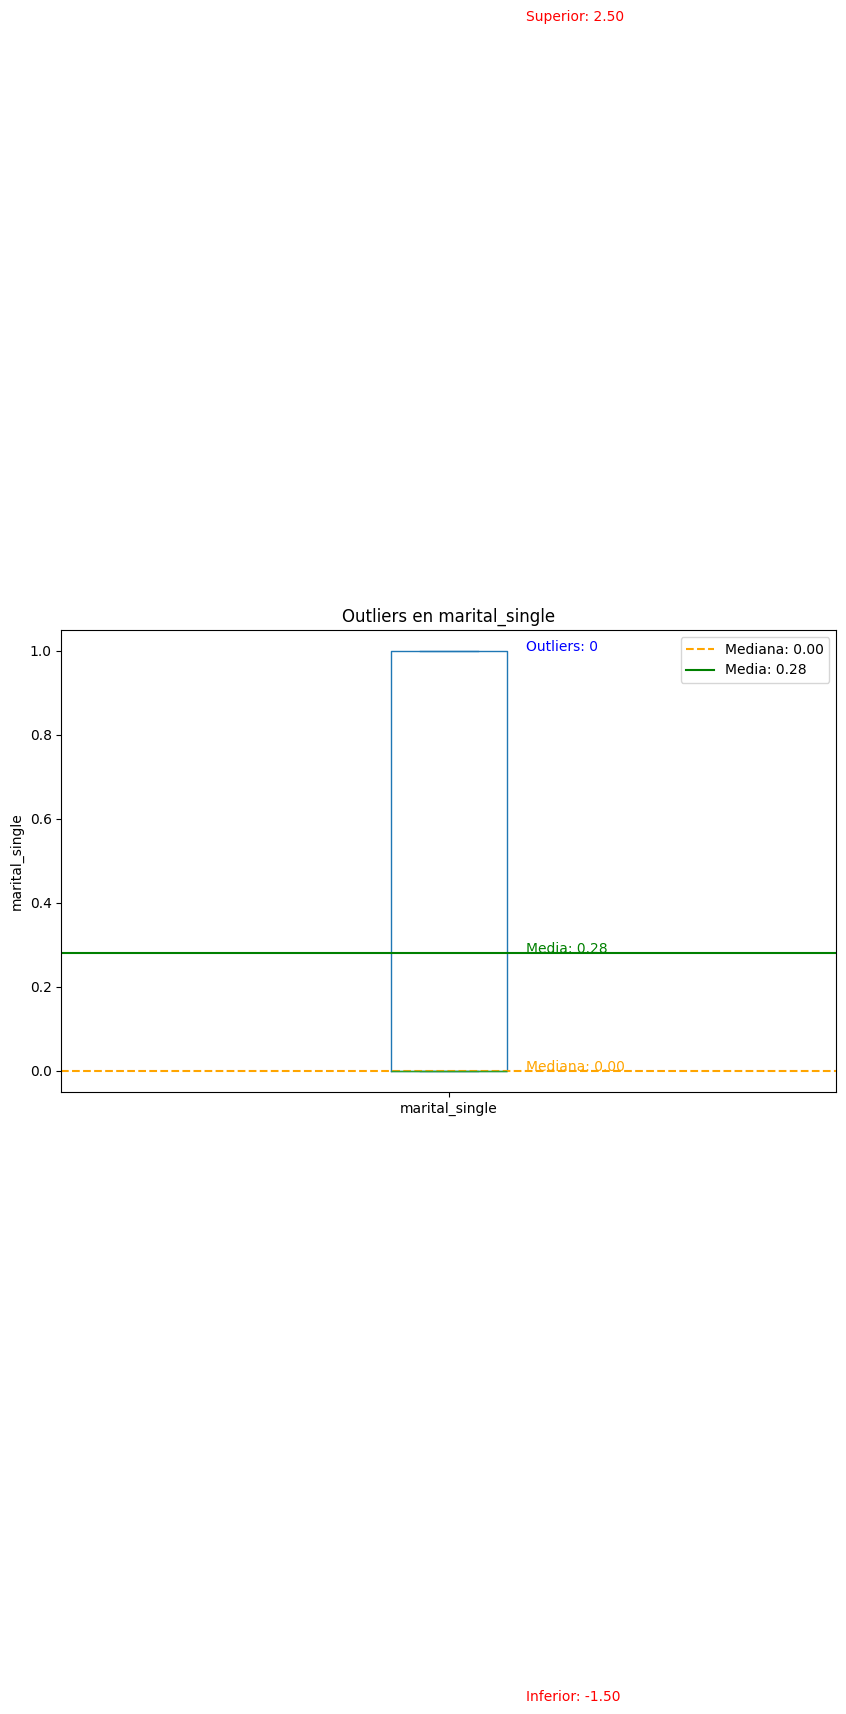

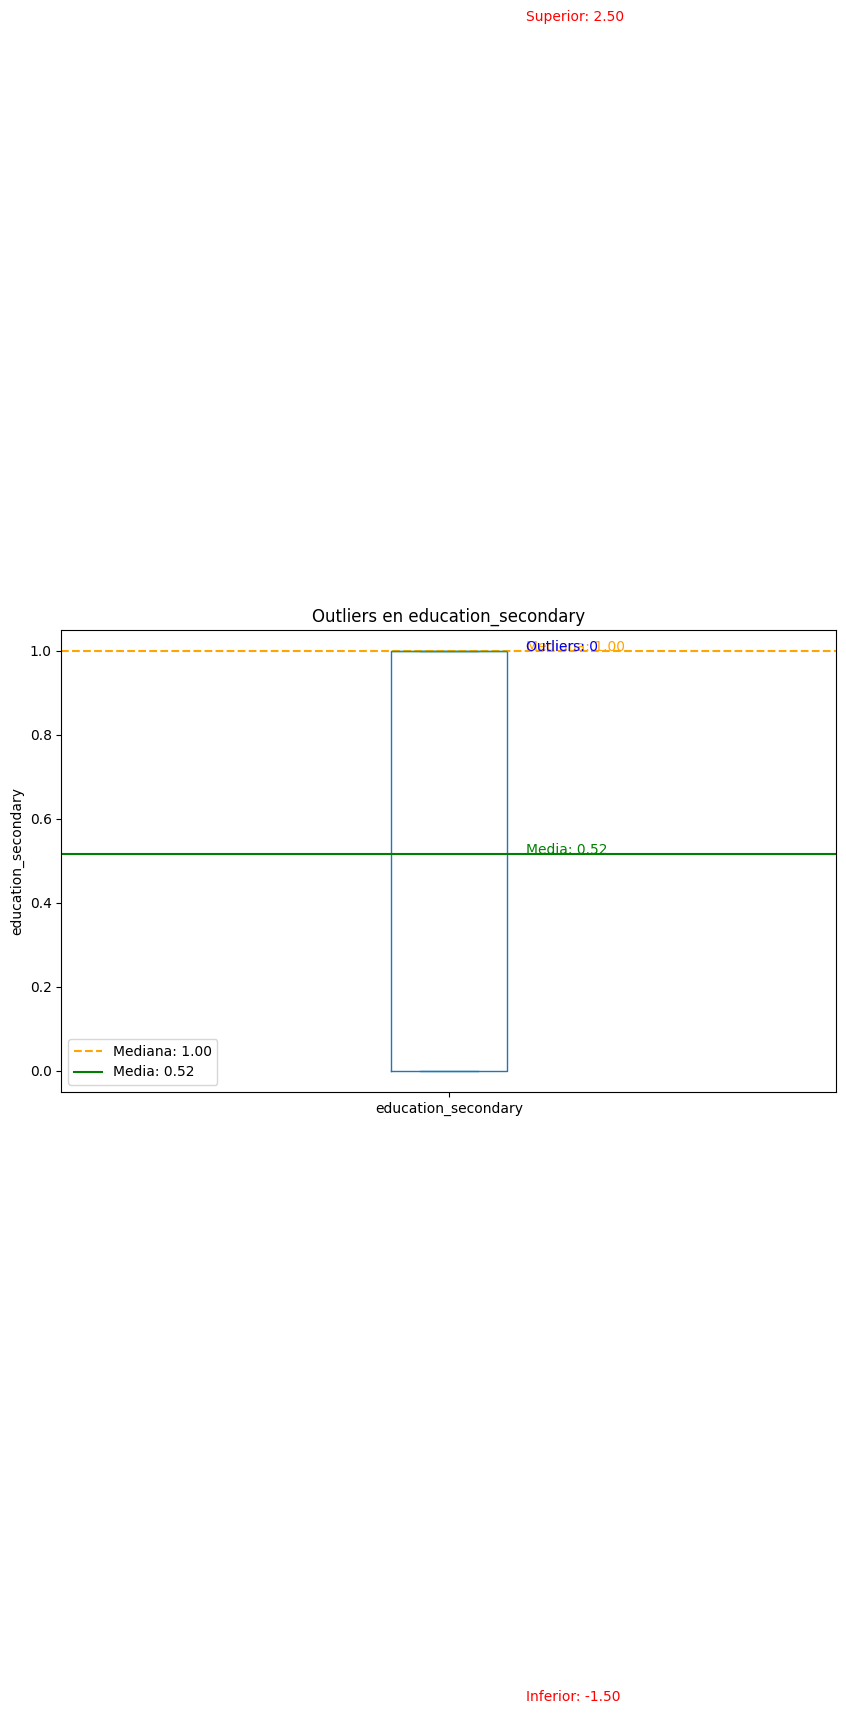

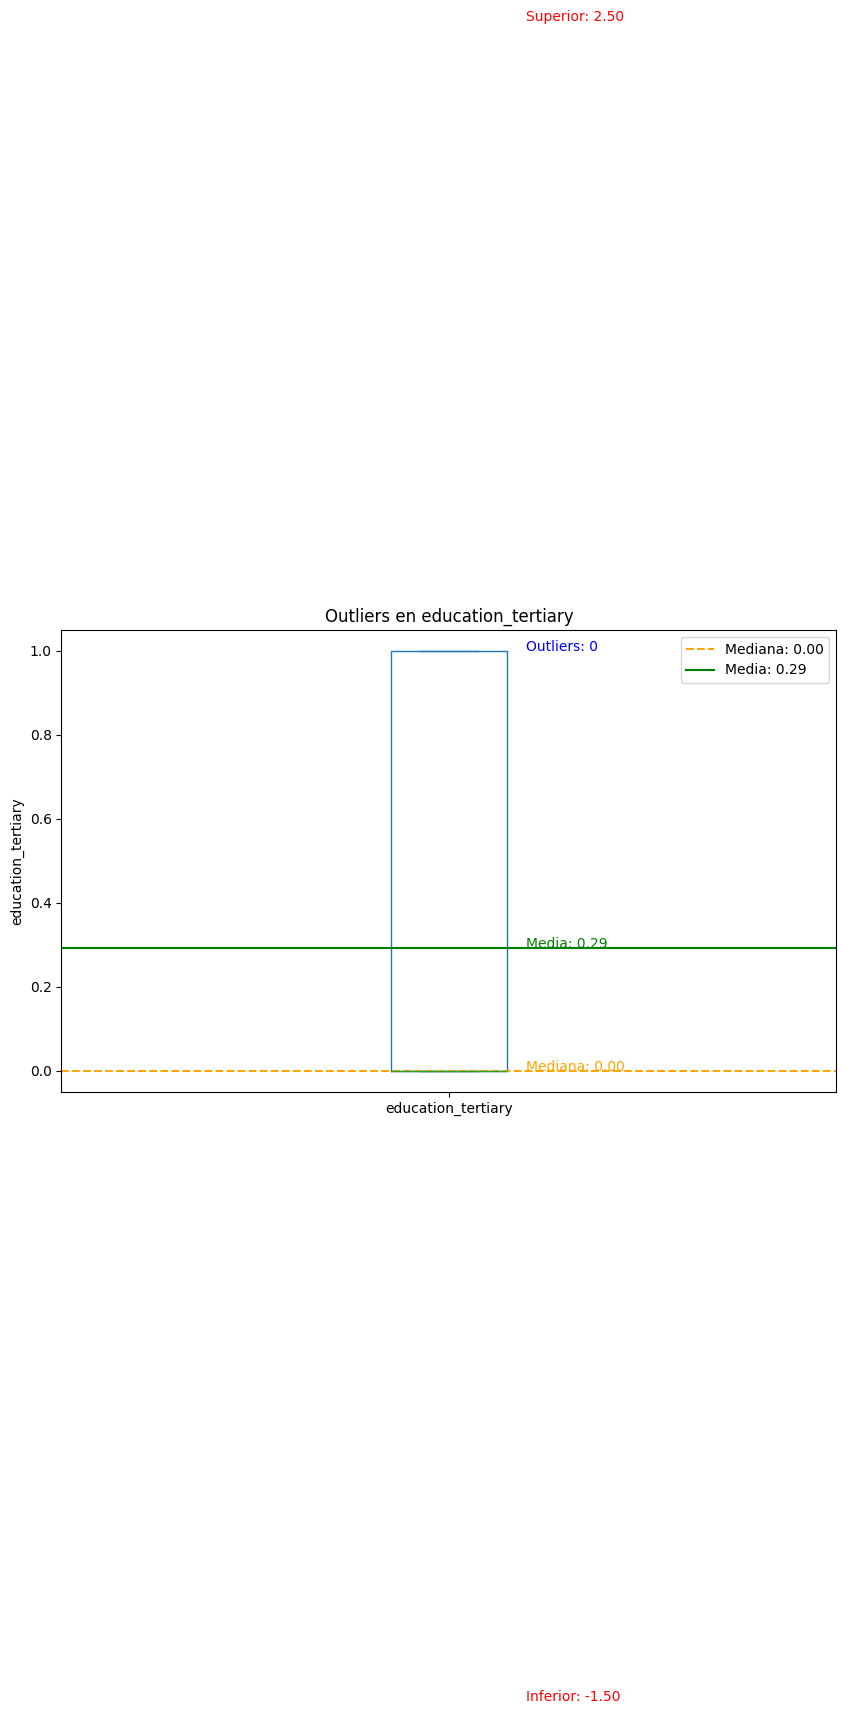

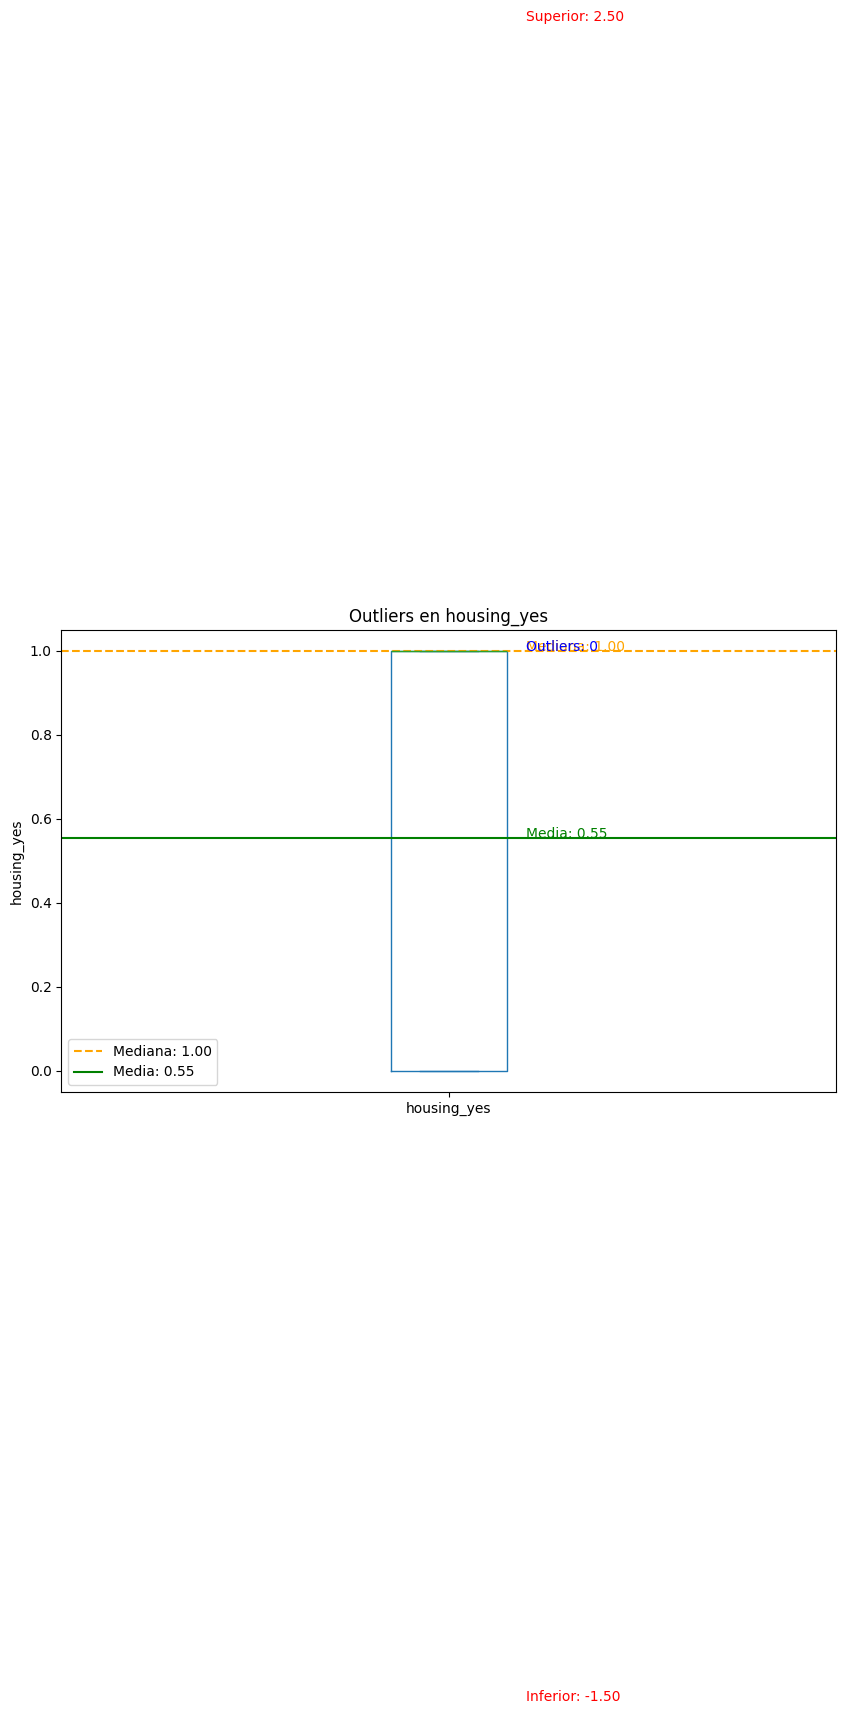

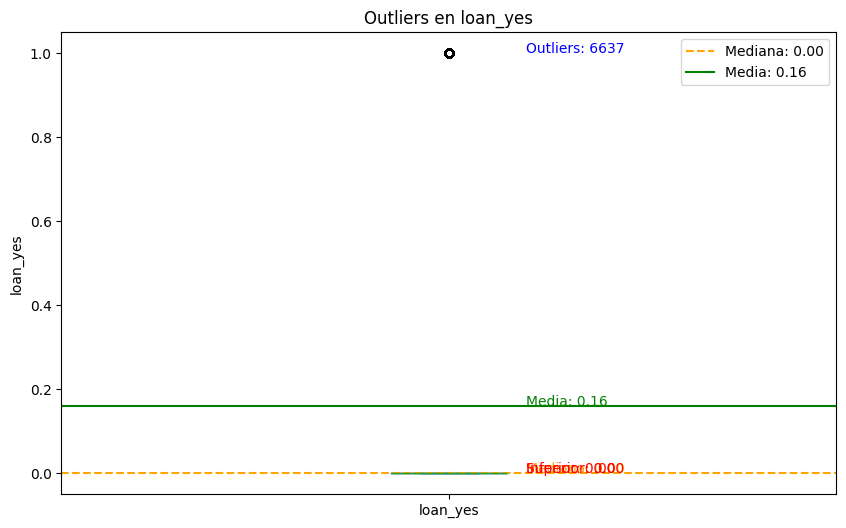

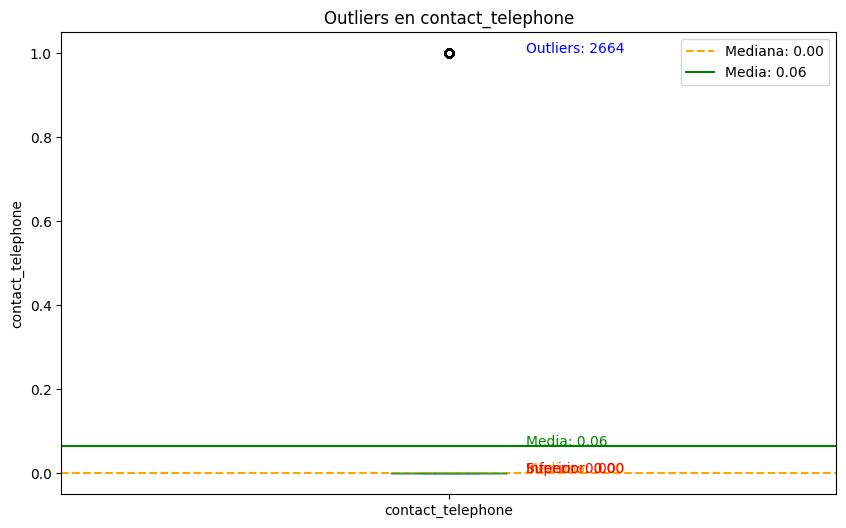

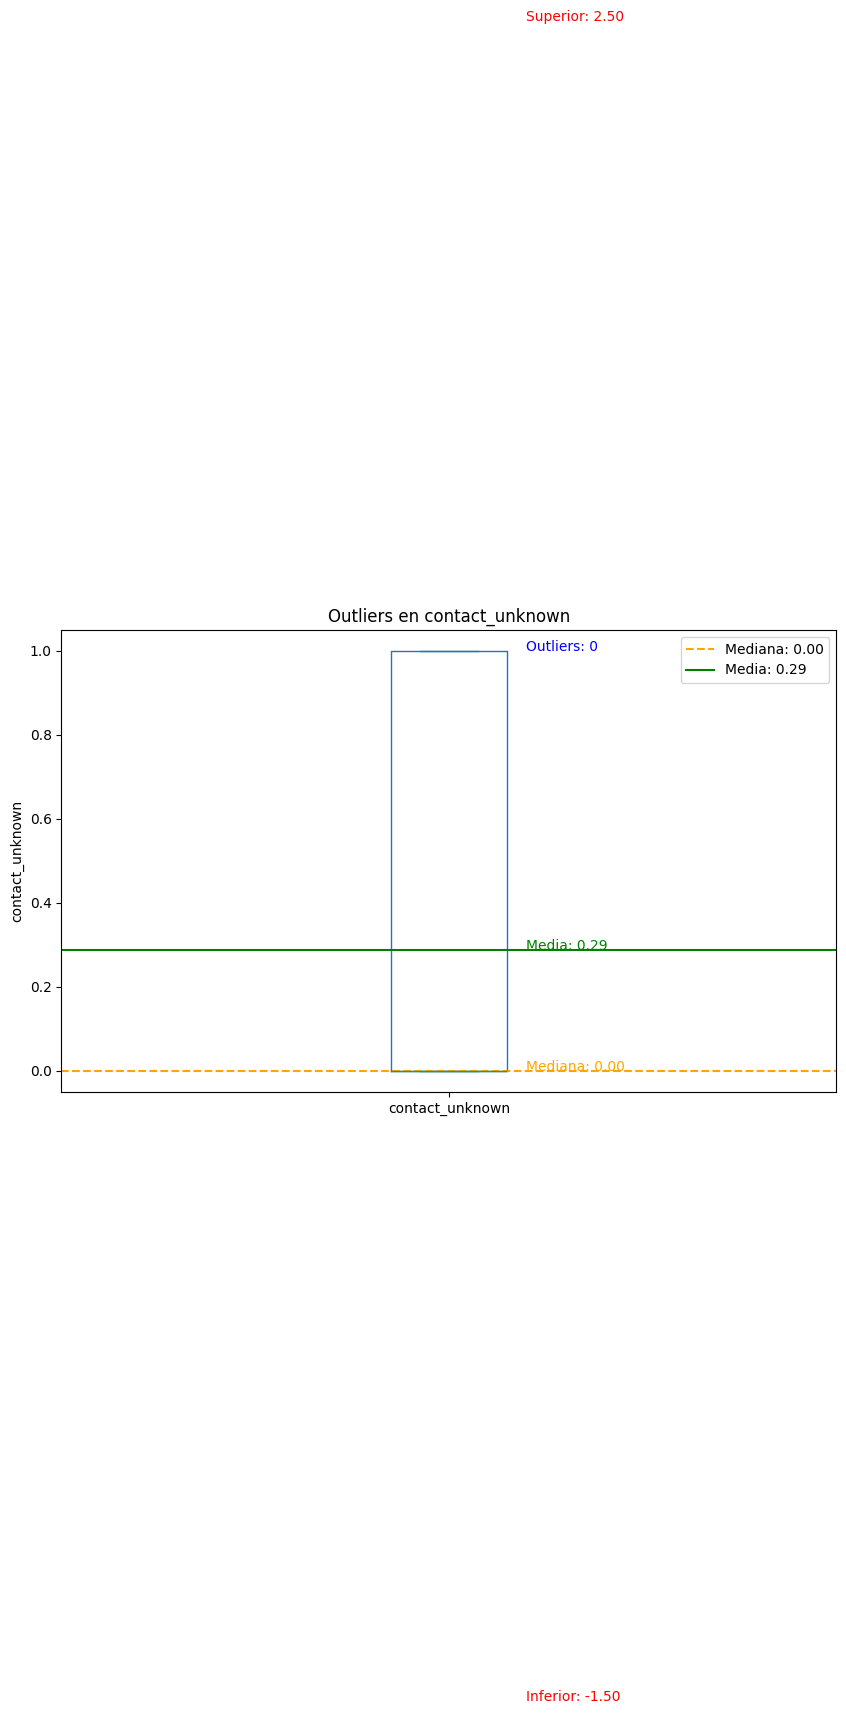

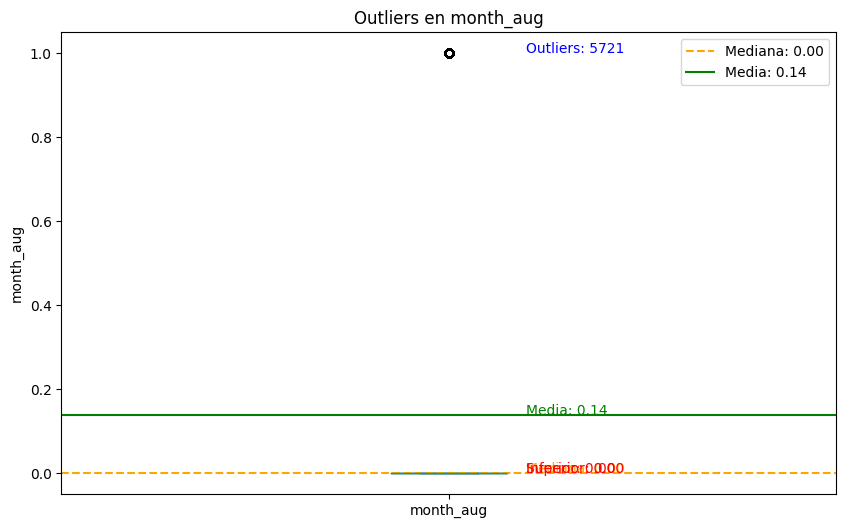

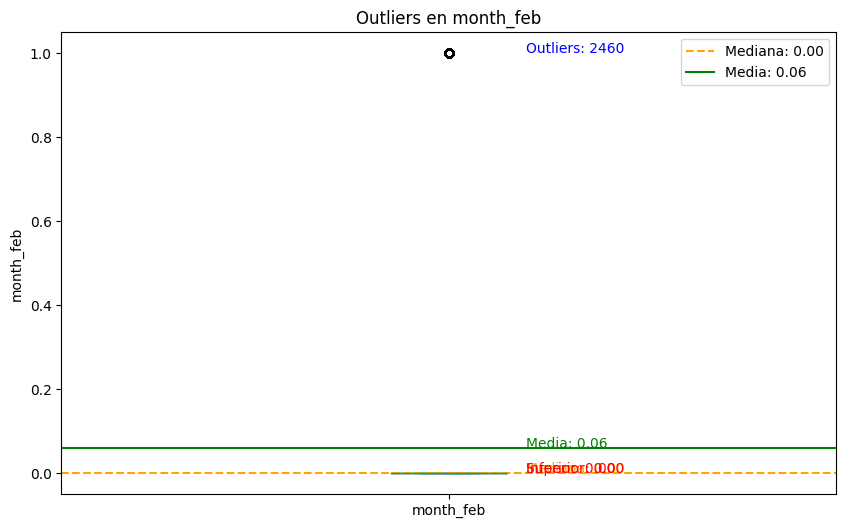

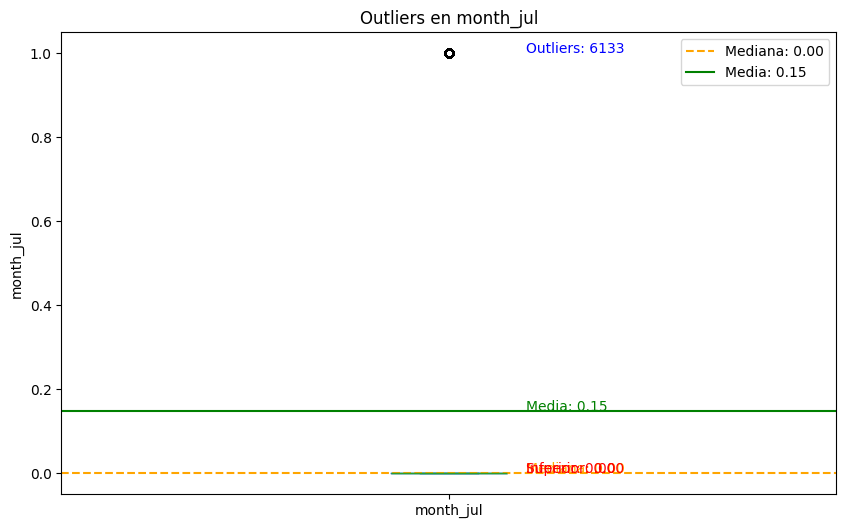

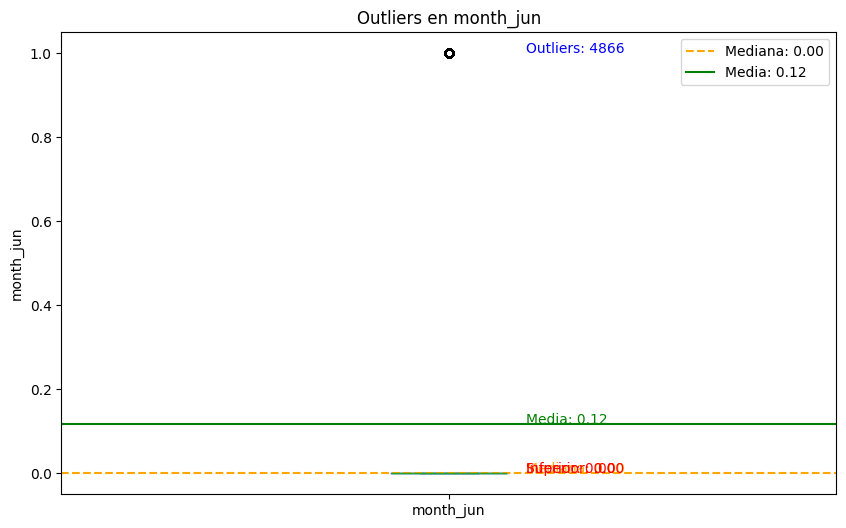

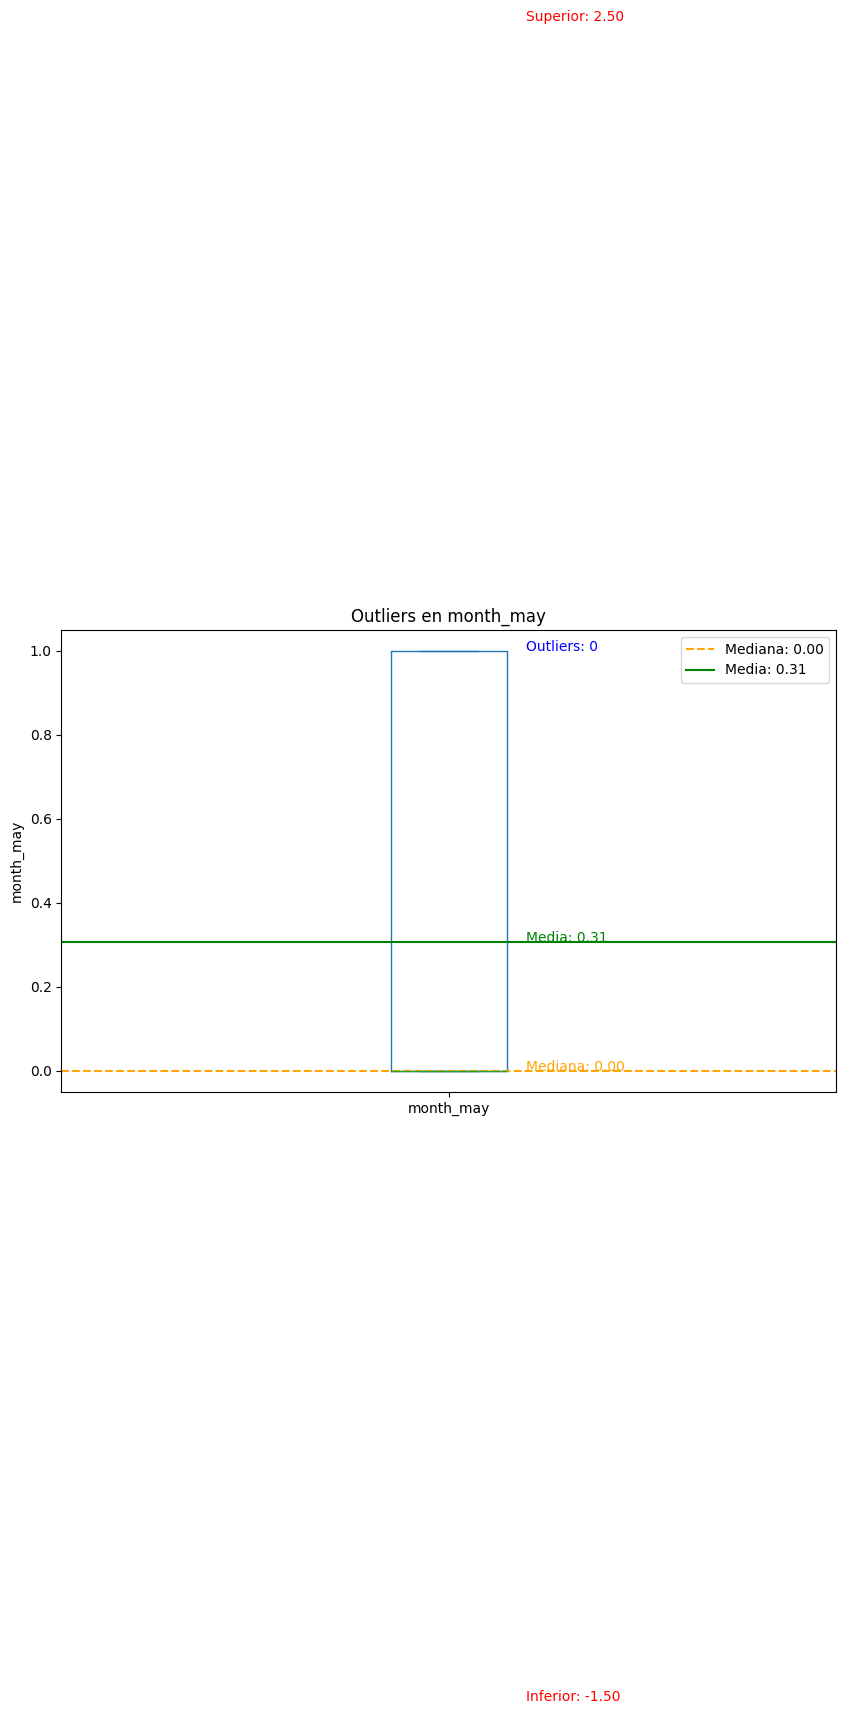

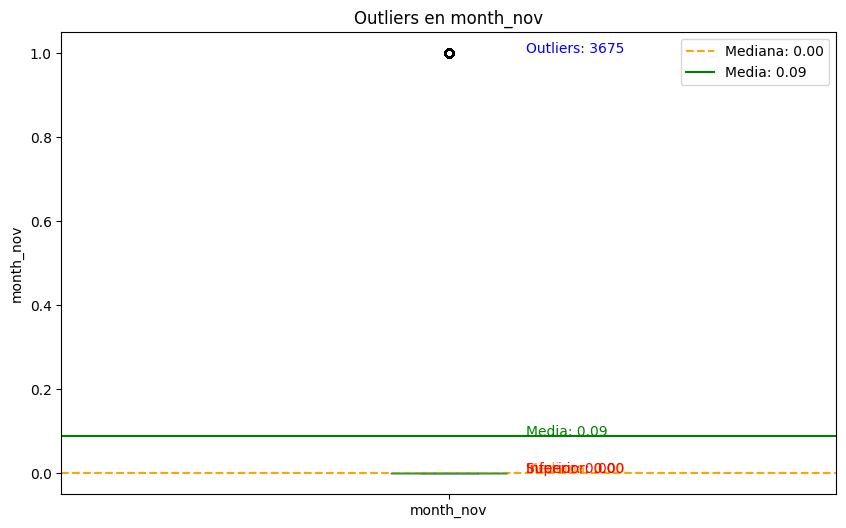

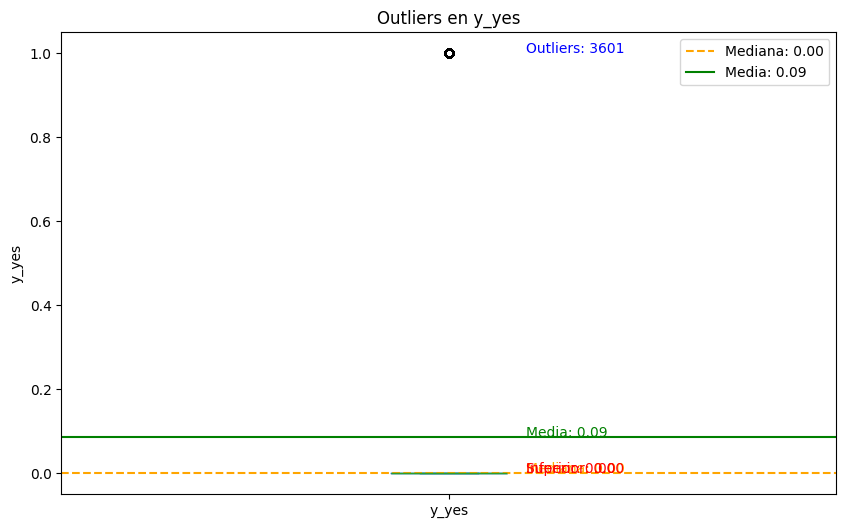

{'age': (10.5, 70.5, 487), 'balance': (-1962.0, 3462.0, 4729), 'day': (-11.5, 40.5, 0), 'duration': (-221.0, 643.0, 3235), 'campaign': (-2.0, 6.0, 3064), 'pdays': (-1.0, -1.0, 8257), 'previous': (0.0, 0.0, 8257), 'job_blue-collar': (0.0, 0.0, 9732), 'job_management': (0.0, 0.0, 9458), 'job_retired': (0.0, 0.0, 2264), 'job_services': (0.0, 0.0, 4154), 'job_technician': (0.0, 0.0, 7597), 'marital_married': (-1.5, 2.5, 0), 'marital_single': (-1.5, 2.5, 0), 'education_secondary': (-1.5, 2.5, 0), 'education_tertiary': (-1.5, 2.5, 0), 'housing_yes': (-1.5, 2.5, 0), 'loan_yes': (0.0, 0.0, 7244), 'contact_telephone': (0.0, 0.0, 2906), 'contact_unknown': (-1.5, 2.5, 0), 'month_aug': (0.0, 0.0, 6247), 'month_feb': (0.0, 0.0, 2649), 'month_jul': (0.0, 0.0, 6895), 'month_jun': (0.0, 0.0, 5341), 'month_may': (-1.5, 2.5, 0), 'month_nov': (0.0, 0.0, 3970), 'y_yes': (0.0, 0.0, 5289)}


In [23]:
import matplotlib.pyplot as plt

# Itera sobre cada columna de df_clean
for i in df_clean.columns:
    plt.figure(figsize=(10, 6))
    
    # Gráfico de caja para la columna actual
    ax = df_clean[i].plot(kind='box', title=f'Outliers en {i}', ylabel=i)
    
    # Cálculo de estadísticas
    median = df_clean[i].median()
    mean = df_clean[i].mean()
    Q1 = df_clean[i].quantile(0.25)
    Q3 = df_clean[i].quantile(0.75)
    IQR = Q3 - Q1

    # Límites de los outliers
    inf = Q1 - 1.5 * IQR
    sup = Q3 + 1.5 * IQR
    
    # Conteo de outliers
    outliers_count = df_clean[(df_clean[i] < inf) | (df_clean[i] > sup)][i].count()

    # Anotaciones en el gráfico
    plt.axhline(y=median, color='orange', linestyle='--', label=f'Mediana: {median:.2f}')
    plt.axhline(y=mean, color='green', linestyle='-', label=f'Media: {mean:.2f}')
    plt.text(x=1.1, y=median, s=f'Mediana: {median:.2f}', color='orange')
    plt.text(x=1.1, y=mean, s=f'Media: {mean:.2f}', color='green')
    plt.text(x=1.1, y=sup, s=f'Superior: {sup:.2f}', color='red')
    plt.text(x=1.1, y=inf, s=f'Inferior: {inf:.2f}', color='red')
    plt.text(x=1.1, y=max(df_clean[i]), s=f'Outliers: {outliers_count}', color='blue')

    plt.legend()
    plt.show()

print(outliers)

CVS hector sin dummies

In [24]:
#eliminar filas de campaing
sindummiesclean=df.drop(index=eliminarca)
sindummiesclean= sindummiesclean.reset_index(drop=True)

#eliminar filas de previuos
sindummiesclean=sindummiesclean.drop(index=eliminarprev)
sindummiesclean= sindummiesclean.reset_index(drop=True)

#elimnar filas duration
sindummiesclean = sindummiesclean.drop(index=eliminardur)
sindummiesclean = sindummiesclean.reset_index(drop=True)


#elimnar filas duration

sindummiesclean = sindummiesclean.drop(index=eliminarpday)
sindummiesclean = sindummiesclean.reset_index(drop=True)

#eliminar columnas 
sindummiesclean = sindummiesclean.drop(columns=['default', 'poutcome'])


sindummiesclean


,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41363,73,retired,married,secondary,2850,no,no,cellular,17,nov,300,1,40,8,yes
41364,25,technician,single,secondary,505,no,yes,cellular,17,nov,386,2,-1,0,yes
41365,71,retired,divorced,primary,1729,no,no,cellular,17,nov,456,2,-1,0,yes
41366,57,blue-collar,married,secondary,668,no,no,telephone,17,nov,508,4,-1,0,no


In [25]:
df_clean

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_management,job_retired,...,loan_yes,contact_telephone,contact_unknown,month_aug,month_feb,month_jul,month_jun,month_may,month_nov,y_yes
0,58,2143,5,261,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,33,2,5,76,1,-1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41363,73,2850,17,300,1,40,8,0,0,1,...,0,0,0,0,0,0,0,0,1,1
41364,25,505,17,386,2,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
41365,71,1729,17,456,2,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
41366,57,668,17,508,4,-1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [26]:
sindummiesclean.to_csv("sindummieslimpio.csv",index=False)
df_clean.to_csv("banklimpio.csv",index=False)